# I. Title

Project Title: Prediksi RNN untuk data penjualan dan prediksi regresi linear untuk data nutrisi tumbuhan

Short description:

Kalbe: prediksi penjualan dengan RNN

Aria: prediksi nutrisi tumbuhan dengan regresi linear

# II. Introduction

Name: Haidar Farras Latief

Description: 

About me: 
Nama saya Haidar Farras Latief. saya lulusan terbaru dari Hacktiv8 Full Time Data Science, dimana saya mendapatkan keahlian teknik machine learning dan deep learning dari projects yang sudah saya selesaikan. Saya berharap semangat dan keahlian saya membuat kontrinbusi positif dalam peluang data scientist.

About this project:

Project ini terbagi dua, yang pertama untuk dataset Kalbe dan yang kedua untuk Aria. Pada bagian pertama, saya membuat prediksi penjualan memakai RNN (Recurrect Neural Network) untuk 14 hari kedepan. Pada bagian kedua, saya membuat analisis dataset dan melakukan prediksi regresi linear.


# III. External Link

# IV. Working Area

## IV.1 Import and/or Install Libraries

In [3]:
# Untuk melakukan manipulasi dataframe
import pandas as pd

# Untuk manipulasi array
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt

# Untuk membantu visualisasi data yang dilakukan oleh matplotlib.pyplot / plt
import seaborn as sns

# Untuk melakukan test korealsi
from sklearn.feature_selection import SelectKBest

# Untuk melakukan test korelasi chi square
from sklearn.feature_selection import chi2

# Untuk memisahkan data train dan data test
from sklearn.model_selection import train_test_split

# Untuk melakukan capping
from feature_engine.outliers import Winsorizer

# Untuk membuat pipleline
from sklearn.pipeline import Pipeline

# Untuk transformasi kolom
from sklearn.compose import ColumnTransformer

# Untuk melakukan encoding secara ordinal
from sklearn.preprocessing import OrdinalEncoder

# Untuk melakukan scaling dengan metode MinMax
from sklearn.preprocessing import MinMaxScaler

# Uuntuk melakukan encoding dengan metode OneHot
from sklearn.preprocessing import OneHotEncoder

# Train the Model
from sklearn.linear_model import LinearRegression 

# Untuk melakukan downsampling
from sklearn.utils import resample

# Untuk menghitung waktu kode berjalan
from time import time

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

## IV.2 Kalbe

### IV.2.1 Kalbe Objective/Expected Result

* Able to forecast 14 days every products and categories from Kalbe’s dataset.
* Your working model able to reach a good Accuracy Rate.
* Able to explain the methodology used for every step, algorithm, data manipulation, data cleansing, etc.
* Able to provide chart or any other measureable methods to prove your inferences.

### IV.2.2 Data Loading

In [4]:
df_Kalbe = pd.read_excel('kalbe_data.xlsx')

In [5]:
file_path = 'kalbe_data.xlsx'

df_Kalbe_A1 = pd.read_excel(file_path, sheet_name = 'A1')
df_Kalbe_A2 = pd.read_excel(file_path, sheet_name = 'A2')
df_Kalbe_B1 = pd.read_excel(file_path, sheet_name = 'B1')
df_Kalbe_B2 = pd.read_excel(file_path, sheet_name = 'B2')

### IV.2.3 Exploratory Data Analysis

#### IV.2.3.1 Observing Data Head

In [6]:
df_Kalbe_A1.head(7)

Day Category Product       Sales
0    1        A      A1  100.000000
1    2        A      A1  101.000000
2    3        A      A1  102.010000
3    4        A      A1  103.030100
4    5        A      A1  104.060401
5    6        A      A1  105.101005
6    7        A      A1  113.000000

In [7]:
df_Kalbe_A2.head(7)

Day Category Product        Sales
0    1        A      A2  1000.000000
1    2        A      A2  1005.000000
2    3        A      A2  1010.025000
3    4        A      A2  1015.075125
4    5        A      A2  1020.150501
5    6        A      A2  1025.251253
6    7        A      A2  1075.377509

In [8]:
df_Kalbe_B1.head(7)

Day Category Product   Sales  Event
0    1        B      B1   990.0      0
1    2        B      B1   980.0      0
2    3        B      B1  1010.0      0
3    4        B      B1  1010.0      0
4    5        B      B1  1000.0      0
5    6        B      B1  1000.0      0
6    7        B      B1  1717.0      1

In [9]:
df_Kalbe_B2.head(7)

Day Category Product  Sales
0    1        B      B2    NaN
1    2        B      B2    NaN
2    3        B      B2    NaN
3    4        B      B2    NaN
4    5        B      B2    NaN
5    6        B      B2    NaN
6    7        B      B2    NaN

#### IV.2.3.2 Data Info

In [10]:
df_Kalbe_A1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [11]:
df_Kalbe_A2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       90 non-null     int64  
 1   Category  90 non-null     object 
 2   Product   90 non-null     object 
 3   Sales     90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [12]:
df_Kalbe_B1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     90 non-null     float64
 4   Event     104 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


Dari info ini, terlihat ada data null. Dari 104 semua data, pada column 'Sales', hanya terdapat 90 data terisi atau tidak null.

In [13]:
df_Kalbe_B2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       104 non-null    int64  
 1   Category  104 non-null    object 
 2   Product   104 non-null    object 
 3   Sales     30 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ KB


Dari info ini, terlihat ada data null. Dari 104 semua data, pada column 'Sales', hanya terdapat 30 data terisi atau tidak null.

#### IV.2.3.3 Null Values Observation

In [14]:
df_Kalbe_B1.isna().sum().sort_values(ascending=False)

Sales       14
Day          0
Category     0
Product      0
Event        0
dtype: int64

In [15]:
df_Kalbe_B2.isna().sum().sort_values(ascending=False)

Sales       74
Day          0
Category     0
Product      0
dtype: int64

Dari 2 kode terakhir ini, terlihat ada 14 data penjualan B1 dan 74 data penjualan B2 yang merupakan data null (atau tidak terisi), untuk visualisasinya akan saya perlihatkan pada kode berikut ini.

In [16]:
import plotly.express as px

In [17]:
fig = px.line(df_Kalbe_A1, x=df_Kalbe_A1.Day, y=df_Kalbe_A1.Sales, labels={'Day':'Day','Sales':'A1 Sales'})
fig.update_layout(title_text='A1 Sales Chart', font_size=15, plot_bgcolor='white', font_color='black')
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Pada data A1, data yang tidak mempunyai null. Terlihat garisnya sampai hari ke 90, yang artinya terdapat data dari hari pertama sampai hari ke 90. Data A1 hanya mempunyai 90 hari.

In [18]:
fig = px.line(df_Kalbe_B1, x=df_Kalbe_B1.Day, y=df_Kalbe_B1.Sales, labels={'Day':'Day','Sales':'B1 Sales'})
fig.update_layout(title_text='B1 Sales Chart', font_size=15, plot_bgcolor='white', font_color='black')
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Namun data B1 mempunyai 104 hari, namun hanya terisi 90 hari. Sama juga dengan garis B2 dibawah ini. 

In [19]:
fig = px.line(df_Kalbe_B2, x=df_Kalbe_B2.Day, y=df_Kalbe_B2.Sales, labels={'Day':'Day','Sales':'B2 Sales'})
fig.update_layout(title_text='B2 Sales Chart', font_size=15, plot_bgcolor='white', font_color='black')
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Pada data B2, data hanya tersedia pada hari ke 60 sampai 90. Data null dari 1 sampai 59 dan 91 sampai 104.

### IV.2.4 Data Pre-Processing

##### IV.2.4.1 Description

Pada tahap ini, data melalui beberapa tahap supaya bisa diproses oleh algoritma modelling. data akan terbagi 4 sesuai produk yaitu A1, A3, B1, dan B2. 

Pada bagian Data Cleaning, data null pada data penjualan produk B1 dan B2 akan dihapus. 

Pada Normalizing Data, data akan dibuat menjadi skala 0 sampai 1.

Pada bagian Data Split, data akan dibagi menjadi data train dan data test, lalu akan ditentukan data target dan data feature.

##### IV.2.4.2 Data Cleaning

In [20]:
# drop data yang hilang (Missing Values)
df_Kalbe_B1_cln = df_Kalbe_B1.dropna(axis=0)

# Melihat lagi apakah ada data yang hilang (Missing Values)
df_Kalbe_B1_cln.isna().sum().sort_values(ascending=False)

Day         0
Category    0
Product     0
Sales       0
Event       0
dtype: int64

In [21]:
# drop data yang hilang (Missing Values)
df_Kalbe_B2_cln = df_Kalbe_B2.dropna(axis=0)

# Melihat lagi apakah ada data yang hilang (Missing Values)
df_Kalbe_B2_cln.isna().sum().sort_values(ascending=False)

Day         0
Category    0
Product     0
Sales       0
dtype: int64

In [22]:
df_Kalbe_B1_cln = df_Kalbe_B1_cln.sort_values('Day')
df_Kalbe_B2_cln = df_Kalbe_B2_cln.sort_values('Day')

In [23]:
df_Kalbe_B1_cln = df_Kalbe_B1_cln.reset_index(drop=True)
df_Kalbe_B2_cln = df_Kalbe_B2_cln.reset_index(drop=True)

In [24]:
df_Kalbe_B1_cln

Day Category Product   Sales  Event
0     1        B      B1   990.0      0
1     2        B      B1   980.0      0
2     3        B      B1  1010.0      0
3     4        B      B1  1010.0      0
4     5        B      B1  1000.0      0
..  ...      ...     ...     ...    ...
85   86        B      B1  1010.0      0
86   87        B      B1  1020.0      0
87   88        B      B1  1455.0      1
88   89        B      B1  1010.0      0
89   90        B      B1   990.0      0

[90 rows x 5 columns]

### IV.4.3 Normalizing Data

#### IV.4.3.1 A1

In [25]:
df_Kalbe_A1_sls = df_Kalbe_A1['Sales']
scaler = MinMaxScaler(feature_range = (0,1))
df_Kalbe_A1_sls_scld = scaler.fit_transform(np.array(df_Kalbe_A1_sls).reshape(-1,1))
print(df_Kalbe_A1_sls_scld.shape)

(90, 1)


#### IV.4.3.2 A2

In [26]:
df_Kalbe_A2_sls = df_Kalbe_A2['Sales']
scaler = MinMaxScaler(feature_range = (0,1))
df_Kalbe_A2_sls_scld = scaler.fit_transform(np.array(df_Kalbe_A2_sls).reshape(-1,1))
print(df_Kalbe_A2_sls_scld.shape)

(90, 1)


#### IV.4.3.3 B1

In [27]:
df_Kalbe_B1_sls = df_Kalbe_B1_cln['Sales']
scaler = MinMaxScaler(feature_range = (0,1))
df_Kalbe_B1_sls_scld = scaler.fit_transform(np.array(df_Kalbe_B1_sls).reshape(-1,1))
print(df_Kalbe_B1_sls_scld.shape)

(90, 1)


##### IV.4.3.4 B2

In [28]:
df_Kalbe_B2_sls = df_Kalbe_B2_cln['Sales']
scaler = MinMaxScaler(feature_range = (0,1))
df_Kalbe_B2_sls_scld = scaler.fit_transform(np.array(df_Kalbe_B2_sls).reshape(-1,1))
print(df_Kalbe_B2_sls_scld.shape)

(30, 1)


### IV.4.4 Data Split

##### IV.4.4.1 Define sequential data split function: create_dataset

In [29]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_pred=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_pred-1):
        a = dataset[i:(i+time_pred), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_pred, 0])
    return np.array(dataX), np.array(dataY)

##### IV.4.4.2 Define Prediction Time

In [30]:
time_pred = 14

##### IV.4.4.3 A1

In [31]:
train_size_Kalbe_A1 = int(len(df_Kalbe_A1_sls_scld)*0.60)
test_size_Kalbe_A1 = len(df_Kalbe_A1_sls_scld)-train_size_Kalbe_A1
train_data_Kalbe_A1, test_data_Kalbe_A1 = df_Kalbe_A1_sls_scld[0:train_size_Kalbe_A1,:],df_Kalbe_A1_sls_scld[train_size_Kalbe_A1:len(df_Kalbe_A1_sls_scld),:1]
print("train_data_Kalbe_A1",train_data_Kalbe_A1.shape)
print("test_data_kalbe_A1",test_data_Kalbe_A1.shape)

train_data_Kalbe_A1 (54, 1)
test_data_kalbe_A1 (36, 1)


In [32]:
X_train_Kalbe_A1, y_train_Kalbe_A1 = create_dataset(train_data_Kalbe_A1, time_pred)
X_test_Kalbe_A1, y_test_Kalbe_A1 = create_dataset(test_data_Kalbe_A1, time_pred)

print("X_train_Kalbe_A1: ", X_train_Kalbe_A1.shape)
print("y_train_Kalbe_A1: ", y_train_Kalbe_A1.shape)
print("X_test_Kalbe_A1: ", X_test_Kalbe_A1.shape)
print("y_test_Kalbe_A1", y_test_Kalbe_A1.shape)

X_train_Kalbe_A1:  (39, 14)
y_train_Kalbe_A1:  (39,)
X_test_Kalbe_A1:  (21, 14)
y_test_Kalbe_A1 (21,)


In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_Kalbe_A1 =X_train_Kalbe_A1.reshape(X_train_Kalbe_A1.shape[0],X_train_Kalbe_A1.shape[1] , 1)
X_test_Kalbe_A1 = X_test_Kalbe_A1.reshape(X_test_Kalbe_A1.shape[0],X_test_Kalbe_A1.shape[1] , 1)

print("X_train_Kalbe_A1: ", X_train_Kalbe_A1.shape)
print("X_test_Kalbe_A1: ", X_test_Kalbe_A1.shape)

X_train_Kalbe_A1:  (39, 14, 1)
X_test_Kalbe_A1:  (21, 14, 1)


##### IV.4.4.4 A2

In [34]:
train_size_Kalbe_A2 = int(len(df_Kalbe_A2_sls_scld)*0.60)
test_size_Kalbe_A2 = len(df_Kalbe_A2_sls_scld)-train_size_Kalbe_A2
train_data_Kalbe_A2, test_data_Kalbe_A2 = df_Kalbe_A2_sls_scld[0:train_size_Kalbe_A2,:],df_Kalbe_A2_sls_scld[train_size_Kalbe_A2:len(df_Kalbe_A2_sls_scld),:1]
print("train_data_Kalbe_A2",train_data_Kalbe_A2.shape)
print("test_data_kalbe_A2",test_data_Kalbe_A2.shape)

train_data_Kalbe_A2 (54, 1)
test_data_kalbe_A2 (36, 1)


In [35]:
X_train_Kalbe_A2, y_train_Kalbe_A2 = create_dataset(train_data_Kalbe_A2, time_pred)
X_test_Kalbe_A2, y_test_Kalbe_A2 = create_dataset(test_data_Kalbe_A2, time_pred)

print("X_train_Kalbe_A2: ", X_train_Kalbe_A2.shape)
print("y_train_Kalbe_A2: ", y_train_Kalbe_A2.shape)
print("X_test_Kalbe_A2: ", X_test_Kalbe_A2.shape)
print("y_test_Kalbe_A2", y_test_Kalbe_A2.shape)

X_train_Kalbe_A2:  (39, 14)
y_train_Kalbe_A2:  (39,)
X_test_Kalbe_A2:  (21, 14)
y_test_Kalbe_A2 (21,)


In [36]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_Kalbe_A2 =X_train_Kalbe_A2.reshape(X_train_Kalbe_A2.shape[0],X_train_Kalbe_A2.shape[1] , 1)
X_test_Kalbe_A2 = X_test_Kalbe_A2.reshape(X_test_Kalbe_A2.shape[0],X_test_Kalbe_A2.shape[1] , 1)

print("X_train_Kalbe_A2: ", X_train_Kalbe_A2.shape)
print("X_test_Kalbe_A2: ", X_test_Kalbe_A2.shape)

X_train_Kalbe_A2:  (39, 14, 1)
X_test_Kalbe_A2:  (21, 14, 1)


##### IV.4.4.5 B1

In [37]:
train_size_Kalbe_B1 = int(len(df_Kalbe_B1_sls_scld)*0.60)
test_size_Kalbe_B1 = len(df_Kalbe_B1_sls_scld)-train_size_Kalbe_B1
train_data_Kalbe_B1, test_data_Kalbe_B1 = df_Kalbe_B1_sls_scld[0:train_size_Kalbe_B1,:],df_Kalbe_B1_sls_scld[train_size_Kalbe_B1:len(df_Kalbe_B1_sls_scld),:1]
print("train_data_Kalbe_B1",train_data_Kalbe_B1.shape)
print("test_data_kalbe_B1",test_data_Kalbe_B1.shape)

train_data_Kalbe_B1 (54, 1)
test_data_kalbe_B1 (36, 1)


In [38]:
X_train_Kalbe_B1, y_train_Kalbe_B1 = create_dataset(train_data_Kalbe_B1, time_pred)
X_test_Kalbe_B1, y_test_Kalbe_B1 = create_dataset(test_data_Kalbe_B1, time_pred)

print("X_train_Kalbe_B1: ", X_train_Kalbe_B1.shape)
print("y_train_Kalbe_B1: ", y_train_Kalbe_B1.shape)
print("X_test_Kalbe_B1: ", X_test_Kalbe_B1.shape)
print("y_test_Kalbe_B1", y_test_Kalbe_B1.shape)

X_train_Kalbe_B1:  (39, 14)
y_train_Kalbe_B1:  (39,)
X_test_Kalbe_B1:  (21, 14)
y_test_Kalbe_B1 (21,)


In [39]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_Kalbe_B1 =X_train_Kalbe_B1.reshape(X_train_Kalbe_B1.shape[0],X_train_Kalbe_B1.shape[1] , 1)
X_test_Kalbe_B1 = X_test_Kalbe_B1.reshape(X_test_Kalbe_B1.shape[0],X_test_Kalbe_B1.shape[1] , 1)

print("X_train_Kalbe_B1: ", X_train_Kalbe_B1.shape)
print("X_test_Kalbe_B1: ", X_test_Kalbe_B1.shape)

X_train_Kalbe_B1:  (39, 14, 1)
X_test_Kalbe_B1:  (21, 14, 1)


##### IV.4.4.6 B2

In [40]:
train_size_Kalbe_B2 = int(len(df_Kalbe_B2_sls_scld)*0.60)
test_size_Kalbe_B2 = len(df_Kalbe_B2_sls_scld)-train_size_Kalbe_B2
train_data_Kalbe_B2, test_data_Kalbe_B2 = df_Kalbe_B2_sls_scld[0:train_size_Kalbe_B2,:],df_Kalbe_B2_sls_scld[train_size_Kalbe_B2:len(df_Kalbe_B2_sls_scld),:1]
print("train_data_Kalbe_B2",train_data_Kalbe_B2.shape)
print("test_data_kalbe_B2",test_data_Kalbe_B2.shape)

train_data_Kalbe_B2 (18, 1)
test_data_kalbe_B2 (12, 1)


In [41]:
time_pred_B2 = 10
X_train_Kalbe_B2, y_train_Kalbe_B2 = create_dataset(train_data_Kalbe_B2, time_pred_B2)
X_test_Kalbe_B2, y_test_Kalbe_B2 = create_dataset(test_data_Kalbe_B2, time_pred_B2)

print("X_train_Kalbe_B2: ", X_train_Kalbe_B2.shape)
print("y_train_Kalbe_B2: ", y_train_Kalbe_B2.shape)
print("X_test_Kalbe_B2: ", X_test_Kalbe_B2.shape)
print("y_test_Kalbe_B2", y_test_Kalbe_B2.shape)

X_train_Kalbe_B2:  (7, 10)
y_train_Kalbe_B2:  (7,)
X_test_Kalbe_B2:  (1, 10)
y_test_Kalbe_B2 (1,)


In [42]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_Kalbe_B2 =X_train_Kalbe_B2.reshape(X_train_Kalbe_B2.shape[0],X_train_Kalbe_B2.shape[1] , 1)
X_test_Kalbe_B2 = X_test_Kalbe_B2.reshape(X_test_Kalbe_B2.shape[0],X_test_Kalbe_B2.shape[1] , 1)

print("X_train_Kalbe_B2: ", X_train_Kalbe_B2.shape)
print("X_test_Kalbe_B2: ", X_test_Kalbe_B2.shape)

X_train_Kalbe_B2:  (7, 10, 1)
X_test_Kalbe_B2:  (1, 10, 1)


### IV.2.5 Data Training

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

#### IV.2.5.1 LSTM

##### IV.2.5.1.1 Define LSTM Neural Network

In [44]:
tf.keras.backend.clear_session()
model_lstm=Sequential()
model_lstm.add(tf.keras.layers.LSTM(14,return_sequences=True,input_shape=(time_pred,1)))
model_lstm.add(tf.keras.layers.LSTM(14))
model_lstm.add(Dropout(0.20))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error',optimizer='Adam')

In [45]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 14)            896       
                                                                 
 lstm_1 (LSTM)               (None, 14)                1624      
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 2,535
Trainable params: 2,535
Non-trainable params: 0
_________________________________________________________________


##### IV.2.5.1.2 A1 LSTM Training

In [46]:
history_lstm_A1 = model_lstm.fit(X_train_Kalbe_A1,y_train_Kalbe_A1,validation_data=(X_test_Kalbe_A1,y_test_Kalbe_A1),epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
2/2 [==============================] - 12s 2s/step - loss: 0.1077 - val_loss: 0.5569
Epoch 2/2000
2/2 [==============================] - 0s 115ms/step - loss: 0.0964 - val_loss: 0.5034
Epoch 3/2000
2/2 [==============================] - 0s 110ms/step - loss: 0.0818 - val_loss: 0.4512
Epoch 4/2000
2/2 [==============================] - 0s 132ms/step - loss: 0.0687 - val_loss: 0.3991
Epoch 5/2000
2/2 [==============================] - 0s 102ms/step - loss: 0.0615 - val_loss: 0.3475
Epoch 6/2000
2/2 [==============================] - 0s 95ms/step - loss: 0.0487 - val_loss: 0.2968
Epoch 7/2000
2/2 [==============================] - 0s 99ms/step - loss: 0.0384 - val_loss: 0.2474
Epoch 8/2000
2/2 [==============================] - 0s 96ms/step - loss: 0.0281 - val_loss: 0.1999
Epoch 9/2000
2/2 [==============================] - 0s 105ms/step - loss: 0.0247 - val_loss: 0.1549
Epoch 10/2000
2/2 [==============================] - 0s 99ms/step - loss: 0.0165 - val_loss: 0.1143
Epoch

##### IV.2.5.1.2 A2 LSTM Training

In [47]:
history_lstm_A2 = model_lstm.fit(X_train_Kalbe_A2,y_train_Kalbe_A2,validation_data=(X_test_Kalbe_A2,y_test_Kalbe_A2),epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
2/2 [==============================] - 0s 152ms/step - loss: 9.0271e-04 - val_loss: 0.0201
Epoch 2/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.0011 - val_loss: 0.0225
Epoch 3/2000
2/2 [==============================] - 0s 94ms/step - loss: 8.8396e-04 - val_loss: 0.0235
Epoch 4/2000
2/2 [==============================] - 0s 83ms/step - loss: 7.0561e-04 - val_loss: 0.0234
Epoch 5/2000
2/2 [==============================] - 0s 80ms/step - loss: 9.4914e-04 - val_loss: 0.0229
Epoch 6/2000
2/2 [==============================] - 0s 90ms/step - loss: 9.0192e-04 - val_loss: 0.0219
Epoch 7/2000
2/2 [==============================] - 0s 81ms/step - loss: 0.0011 - val_loss: 0.0198
Epoch 8/2000
2/2 [==============================] - 0s 82ms/step - loss: 0.0010 - val_loss: 0.0192
Epoch 9/2000
2/2 [==============================] - 0s 92ms/step - loss: 0.0015 - val_loss: 0.0191
Epoch 10/2000
2/2 [==============================] - 0s 120ms/step - loss: 8.9061e-04 - 

##### IV.2.5.1.2 B1 LSTM Training

In [48]:
history_lstm_B1 = model_lstm.fit(X_train_Kalbe_B1,y_train_Kalbe_B1,validation_data=(X_test_Kalbe_B1,y_test_Kalbe_B1),epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
2/2 [==============================] - 0s 106ms/step - loss: 0.0850 - val_loss: 0.0458
Epoch 2/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.0769 - val_loss: 0.0416
Epoch 3/2000
2/2 [==============================] - 0s 88ms/step - loss: 0.0787 - val_loss: 0.0409
Epoch 4/2000
2/2 [==============================] - 0s 84ms/step - loss: 0.0776 - val_loss: 0.0401
Epoch 5/2000
2/2 [==============================] - 0s 86ms/step - loss: 0.0781 - val_loss: 0.0395
Epoch 6/2000
2/2 [==============================] - 0s 83ms/step - loss: 0.0715 - val_loss: 0.0391
Epoch 7/2000
2/2 [==============================] - 0s 87ms/step - loss: 0.0703 - val_loss: 0.0389
Epoch 8/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.0726 - val_loss: 0.0388
Epoch 9/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.0703 - val_loss: 0.0385
Epoch 10/2000
2/2 [==============================] - 0s 122ms/step - loss: 0.0756 - val_loss: 0.0386
Epoch 1

##### IV.2.5.1.2 B2 LSTM Training

In [49]:
tf.keras.backend.clear_session()
model_lstm_B2=Sequential()
model_lstm_B2.add(tf.keras.layers.LSTM(10,return_sequences=True,input_shape=(time_pred_B2,1)))
model_lstm_B2.add(tf.keras.layers.LSTM(10))
model_lstm_B2.add(Dropout(0.20))
model_lstm_B2.add(Dense(1))
model_lstm_B2.compile(loss='mean_squared_error',optimizer='Adam')

In [50]:
history_lstm_B2 = model_lstm_B2.fit(X_train_Kalbe_B2,y_train_Kalbe_B2,validation_data=(X_test_Kalbe_B2,y_test_Kalbe_B2),epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
1/1 [==============================] - 6s 6s/step - loss: 0.2803 - val_loss: 0.7598
Epoch 2/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.2758 - val_loss: 0.7240
Epoch 3/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.2962 - val_loss: 0.6898
Epoch 4/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.2585 - val_loss: 0.6559
Epoch 5/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.2553 - val_loss: 0.6220
Epoch 6/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.2334 - val_loss: 0.5882
Epoch 7/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.2477 - val_loss: 0.5550
Epoch 8/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.2277 - val_loss: 0.5221
Epoch 9/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.2143 - val_loss: 0.4894
Epoch 10/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.2077 - val_loss: 0.4573
Epoch 11/20

#### IV.2.5.2 GRU

##### IV.2.5.1.1 Define GRU Neural Network

In [51]:
tf.keras.backend.clear_session()
model_gru=Sequential()
model_gru.add(tf.keras.layers.GRU(14,return_sequences=True,input_shape=(time_pred,1)))
model_gru.add(tf.keras.layers.GRU(14))
model_gru.add(Dropout(0.20))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error',optimizer='Adam')

In [52]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 14, 14)            714       
                                                                 
 gru_1 (GRU)                 (None, 14)                1260      
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 1,989
Trainable params: 1,989
Non-trainable params: 0
_________________________________________________________________


##### IV.2.5.2.2 A1 GRU Training

In [53]:
history_gru_A1 = model_gru.fit(X_train_Kalbe_A1,y_train_Kalbe_A1,validation_data=(X_test_Kalbe_A1,y_test_Kalbe_A1),epochs=4000,batch_size=32,verbose=1)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 73ms/step - loss: 7.1839e-04 - val_loss: 0.0059
Epoch 1502/4000
2/2 [==============================] - 0s 75ms/step - loss: 8.5190e-04 - val_loss: 0.0059
Epoch 1503/4000
2/2 [==============================] - 0s 71ms/step - loss: 8.1224e-04 - val_loss: 0.0060
Epoch 1504/4000
2/2 [==============================] - 0s 77ms/step - loss: 8.5942e-04 - val_loss: 0.0059
Epoch 1505/4000
2/2 [==============================] - 0s 77ms/step - loss: 8.7433e-04 - val_loss: 0.0053
Epoch 1506/4000
2/2 [==============================] - 0s 80ms/step - loss: 7.3741e-04 - val_loss: 0.0046
Epoch 1507/4000
2/2 [==============================] - 0s 87ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 1508/4000
2/2 [==============================] - 0s 73ms/step - loss: 9.1368e-04 - val_loss: 0.0040
Epoch 1509/4000
2/2 [==============================] - 0s 73ms/step - loss: 9.6106e-04 - val_loss: 0.0039
Epoch 1510/4000

##### IV.2.5.2.3 A1 GRU Training

In [54]:
history_gru_A2 = model_gru.fit(X_train_Kalbe_A2,y_train_Kalbe_A2,validation_data=(X_test_Kalbe_A2,y_test_Kalbe_A2),epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
2/2 [==============================] - 0s 101ms/step - loss: 0.0011 - val_loss: 0.0252
Epoch 2/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.0011 - val_loss: 0.0262
Epoch 3/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.0014 - val_loss: 0.0287
Epoch 4/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.0010 - val_loss: 0.0323
Epoch 5/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.0010 - val_loss: 0.0341
Epoch 6/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0010 - val_loss: 0.0327
Epoch 7/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.0010 - val_loss: 0.0289
Epoch 8/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.0010 - val_loss: 0.0228
Epoch 9/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.0011 - val_loss: 0.0184
Epoch 10/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.0011 - val_loss: 0.0177
Epoch 11

##### IV.2.5.2.4 B1 GRU Training

In [55]:
history_gru_B1 = model_gru.fit(X_train_Kalbe_B1,y_train_Kalbe_B1,validation_data=(X_test_Kalbe_B1,y_test_Kalbe_B1),epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
2/2 [==============================] - 0s 106ms/step - loss: 0.1506 - val_loss: 0.0524
Epoch 2/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.1174 - val_loss: 0.0367
Epoch 3/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.1004 - val_loss: 0.0459
Epoch 4/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.0975 - val_loss: 0.0420
Epoch 5/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.1042 - val_loss: 0.0342
Epoch 6/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.0729 - val_loss: 0.0405
Epoch 7/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.0788 - val_loss: 0.0490
Epoch 8/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.0804 - val_loss: 0.0524
Epoch 9/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.0805 - val_loss: 0.0495
Epoch 10/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.0780 - val_loss: 0.0437
Epoch 11

##### IV.2.5.2.5 B2 GRU Training

In [57]:
time_pred_B2 = 10
tf.keras.backend.clear_session()
model_gru_B2=Sequential()
model_gru_B2.add(tf.keras.layers.GRU(10,return_sequences=True,input_shape=(time_pred_B2,1)))
model_gru_B2.add(tf.keras.layers.GRU(10))
model_gru_B2.add(Dropout(0.20))
model_gru_B2.add(Dense(1))
model_gru_B2.compile(loss='mean_squared_error',optimizer='Adam')

In [58]:
history_gru_B2 = model_gru_B2.fit(X_train_Kalbe_B2,y_train_Kalbe_B2,validation_data=(X_test_Kalbe_B2,y_test_Kalbe_B2),epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
1/1 [==============================] - 6s 6s/step - loss: 0.5530 - val_loss: 2.4100
Epoch 2/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.4929 - val_loss: 2.3372
Epoch 3/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.5714 - val_loss: 2.2656
Epoch 4/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.5628 - val_loss: 2.1965
Epoch 5/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.5611 - val_loss: 2.1288
Epoch 6/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.5190 - val_loss: 2.0627
Epoch 7/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.4963 - val_loss: 1.9982
Epoch 8/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.4514 - val_loss: 1.9355
Epoch 9/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.4379 - val_loss: 1.8745
Epoch 10/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.4345 - val_loss: 1.8150
Epoch 11/20

#### IV.2.5.3 Vanilla RNN

##### IV.2.5.3.1 Define Vanilla Recurrent Neural Network

In [59]:
from tensorflow.keras.layers import SimpleRNN

In [60]:
tf.keras.backend.clear_session()
model_vnla = Sequential()
model_vnla.add(SimpleRNN(14, input_shape=(time_pred, 1), activation='tanh'))
model_vnla.add(Dropout(0.20))
model_vnla.add(Dense(1))
model_vnla.compile(loss='mean_squared_error', optimizer='Adam')

In [61]:
model_vnla.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 14)                224       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense (Dense)               (None, 1)                 15        
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


##### IV.2.5.2.2 A1 Vanilla RNN Training

In [62]:
history_vnla_A1 = model_vnla.fit(X_train_Kalbe_A1,y_train_Kalbe_A1,validation_data=(X_test_Kalbe_A1,y_test_Kalbe_A1),epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
2/2 [==============================] - 1s 274ms/step - loss: 0.0477 - val_loss: 0.1437
Epoch 2/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.0453 - val_loss: 0.0904
Epoch 3/2000
2/2 [==============================] - 0s 45ms/step - loss: 0.0304 - val_loss: 0.0635
Epoch 4/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.0362 - val_loss: 0.0445
Epoch 5/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.0350 - val_loss: 0.0342
Epoch 6/2000
2/2 [==============================] - 0s 44ms/step - loss: 0.0430 - val_loss: 0.0354
Epoch 7/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.0231 - val_loss: 0.0428
Epoch 8/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.0213 - val_loss: 0.0540
Epoch 9/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.0094 - val_loss: 0.0652
Epoch 10/2000
2/2 [==============================] - 0s 44ms/step - loss: 0.0170 - val_loss: 0.0701
Epoch 11

##### IV.2.5.2.3 A2 Vanilla RNN Training

In [63]:
history_vnla_A2 = model_vnla.fit(X_train_Kalbe_A2,y_train_Kalbe_A2,validation_data=(X_test_Kalbe_A2,y_test_Kalbe_A2),epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
2/2 [==============================] - 0s 80ms/step - loss: 3.3147e-04 - val_loss: 0.0089
Epoch 2/2000
2/2 [==============================] - 0s 37ms/step - loss: 5.5432e-04 - val_loss: 0.0091
Epoch 3/2000
2/2 [==============================] - 0s 38ms/step - loss: 7.3816e-04 - val_loss: 0.0095
Epoch 4/2000
2/2 [==============================] - 0s 37ms/step - loss: 3.8143e-04 - val_loss: 0.0097
Epoch 5/2000
2/2 [==============================] - 0s 37ms/step - loss: 3.5242e-04 - val_loss: 0.0091
Epoch 6/2000
2/2 [==============================] - 0s 35ms/step - loss: 6.0053e-04 - val_loss: 0.0085
Epoch 7/2000
2/2 [==============================] - 0s 38ms/step - loss: 4.5289e-04 - val_loss: 0.0088
Epoch 8/2000
2/2 [==============================] - 0s 36ms/step - loss: 7.7134e-04 - val_loss: 0.0093
Epoch 9/2000
2/2 [==============================] - 0s 40ms/step - loss: 6.5048e-04 - val_loss: 0.0098
Epoch 10/2000
2/2 [==============================] - 0s 36ms/step - loss:

##### IV.2.5.2.4 B1 Vanilla RNN Training

In [64]:
history_vnla_B1 = model_vnla.fit(X_train_Kalbe_B1,y_train_Kalbe_B1,validation_data=(X_test_Kalbe_B1,y_test_Kalbe_B1),epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
2/2 [==============================] - 0s 126ms/step - loss: 0.1335 - val_loss: 0.0880
Epoch 2/2000
2/2 [==============================] - 0s 81ms/step - loss: 0.0957 - val_loss: 0.0797
Epoch 3/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.1010 - val_loss: 0.0742
Epoch 4/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.0761 - val_loss: 0.0722
Epoch 5/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.0801 - val_loss: 0.0707
Epoch 6/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.0713 - val_loss: 0.0687
Epoch 7/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.0570 - val_loss: 0.0741
Epoch 8/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.0684 - val_loss: 0.0795
Epoch 9/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.0626 - val_loss: 0.0731
Epoch 10/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.0606 - val_loss: 0.0634
Epoch 11

##### IV.2.5.2.5 B2 Vanilla RNN Training

In [65]:
time_pred_B2 = 10
tf.keras.backend.clear_session()
model_vnla_B2 = Sequential()
model_vnla_B2.add(SimpleRNN(10, input_shape=(time_pred_B2, 1), activation='tanh'))
model_vnla_B2.add(Dropout(0.20))
model_vnla_B2.add(Dense(1))
model_vnla_B2.compile(loss='mean_squared_error', optimizer='Adam')

In [66]:
history_vnla_B2 = model_vnla_B2.fit(X_train_Kalbe_B2,y_train_Kalbe_B2,validation_data=(X_test_Kalbe_B2,y_test_Kalbe_B2),epochs=2000,batch_size=32,verbose=1)

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 0.6322 - val_loss: 2.2842
Epoch 2/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.8240 - val_loss: 2.2265
Epoch 3/2000
1/1 [==============================] - 0s 60ms/step - loss: 1.0794 - val_loss: 2.1742
Epoch 4/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.6462 - val_loss: 2.1239
Epoch 5/2000
1/1 [==============================] - 0s 77ms/step - loss: 1.4377 - val_loss: 2.0761
Epoch 6/2000
1/1 [==============================] - 0s 100ms/step - loss: 0.6456 - val_loss: 2.0290
Epoch 7/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.6855 - val_loss: 1.9819
Epoch 8/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.8164 - val_loss: 1.9354
Epoch 9/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.5690 - val_loss: 1.8898
Epoch 10/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.3814 - val_loss: 1.8455
Epoch 11/2

### IV.2.6 Model Evaluation

#### IV.2.6.1 Validation Loss

##### IV.2.6.1.1 LSTM

###### IV.2.6.1.1.1 A1 LSTM

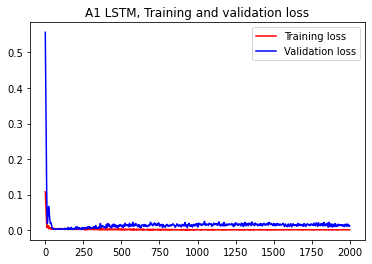

<Figure size 432x288 with 0 Axes>

In [67]:
loss = history_lstm_A1.history['loss']
val_loss = history_lstm_A1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('A1 LSTM, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [68]:
### Lets Do the prediction and check performance metrics
train_predict_lstm_A1=model_lstm.predict(X_train_Kalbe_A1)
test_predict_lstm_A1=model_lstm.predict(X_test_Kalbe_A1)
train_predict_lstm_A1.shape, test_predict_lstm_A1.shape

1/1 [==============================] - 0s 29ms/step


((39, 1), (21, 1))

###### IV.2.6.1.1.2 A2 LSTM

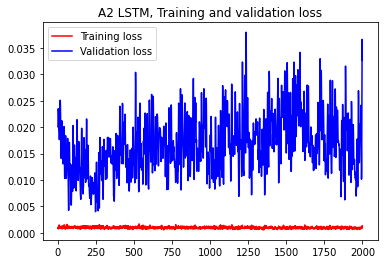

<Figure size 432x288 with 0 Axes>

In [69]:
loss = history_lstm_A2.history['loss']
val_loss = history_lstm_A2.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('A2 LSTM, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [70]:
train_predict_lstm_A2=model_lstm.predict(X_train_Kalbe_A2)
test_predict_lstm_A2=model_lstm.predict(X_test_Kalbe_A2)
train_predict_lstm_A2.shape, test_predict_lstm_A2.shape

1/1 [==============================] - 0s 36ms/step


((39, 1), (21, 1))

###### IV.2.6.1.1.3 B1 LSTM

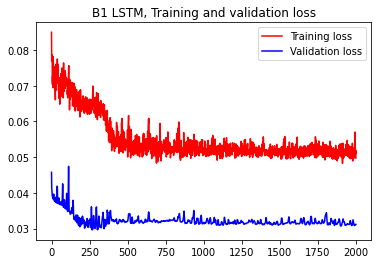

<Figure size 432x288 with 0 Axes>

In [71]:
loss = history_lstm_B1.history['loss']
val_loss = history_lstm_B1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('B1 LSTM, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [72]:
train_predict_lstm_B1=model_lstm.predict(X_train_Kalbe_B1)
test_predict_lstm_B1=model_lstm.predict(X_test_Kalbe_B1)
train_predict_lstm_B1.shape, test_predict_lstm_B1.shape

1/1 [==============================] - 0s 28ms/step


((39, 1), (21, 1))

###### IV.2.6.1.1.4 B2 LSTM

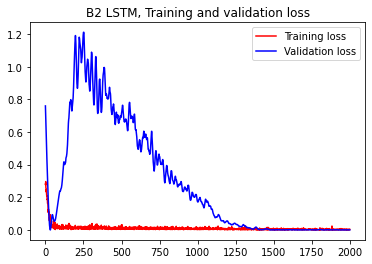

<Figure size 432x288 with 0 Axes>

In [73]:
loss = history_lstm_B2.history['loss']
val_loss = history_lstm_B2.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('B2 LSTM, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [74]:
train_predict_lstm_B2=model_lstm_B2.predict(X_train_Kalbe_B2)
test_predict_lstm_B2=model_lstm_B2.predict(X_test_Kalbe_B2)
train_predict_lstm_B2.shape, test_predict_lstm_B2.shape

1/1 [==============================] - 0s 32ms/step


((7, 1), (1, 1))

##### IV.2.6.1.2 GRU

###### IV.2.6.1.2.1 A1 GRU

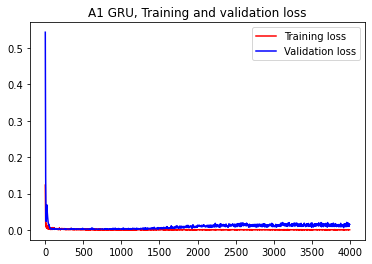

<Figure size 432x288 with 0 Axes>

In [75]:
loss = history_gru_A1.history['loss']
val_loss = history_gru_A1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('A1 GRU, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [76]:
train_predict_gru_A1=model_gru.predict(X_train_Kalbe_A1)
test_predict_gru_A1=model_gru.predict(X_test_Kalbe_A1)
train_predict_gru_A1.shape, test_predict_gru_A1.shape

1/1 [==============================] - 0s 26ms/step


((39, 1), (21, 1))

###### IV.2.6.1.2.2 A2 GRU

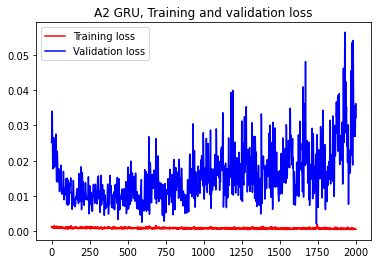

<Figure size 432x288 with 0 Axes>

In [77]:
loss = history_gru_A2.history['loss']
val_loss = history_gru_A2.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('A2 GRU, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [78]:
train_predict_gru_A2=model_gru.predict(X_train_Kalbe_A2)
test_predict_gru_A2=model_gru.predict(X_test_Kalbe_A2)
train_predict_gru_A2.shape, test_predict_gru_A2.shape

1/1 [==============================] - 0s 27ms/step


((39, 1), (21, 1))

###### IV.2.6.1.2.2 B1 GRU

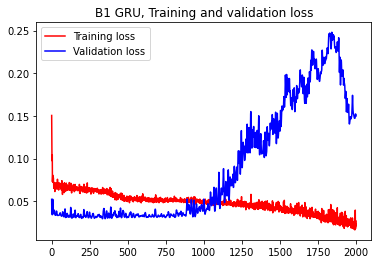

<Figure size 432x288 with 0 Axes>

In [79]:
loss = history_gru_B1.history['loss']
val_loss = history_gru_B1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('B1 GRU, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [80]:
train_predict_gru_B1=model_gru.predict(X_train_Kalbe_B1)
test_predict_gru_B1=model_gru.predict(X_test_Kalbe_B1)
train_predict_gru_B1.shape, test_predict_gru_B1.shape

1/1 [==============================] - 0s 25ms/step


((39, 1), (21, 1))

###### IV.2.6.1.2.4 B2 GRU

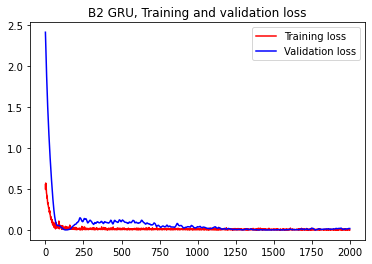

<Figure size 432x288 with 0 Axes>

In [81]:
loss = history_gru_B2.history['loss']
val_loss = history_gru_B2.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('B2 GRU, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [82]:
train_predict_gru_B2=model_gru_B2.predict(X_train_Kalbe_B2)
test_predict_gru_B2=model_gru_B2.predict(X_test_Kalbe_B2)
train_predict_gru_B2.shape, test_predict_gru_B2.shape

1/1 [==============================] - 0s 26ms/step


((7, 1), (1, 1))

##### IV.2.6.1.3 Vanilla RNN

###### IV.2.6.1.3.1 A1 Vanilla RNN

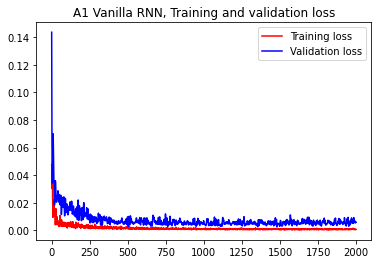

<Figure size 432x288 with 0 Axes>

In [83]:
loss = history_vnla_A1.history['loss']
val_loss = history_vnla_A1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('A1 Vanilla RNN, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [84]:
train_predict_vnla_A1=model_vnla.predict(X_train_Kalbe_A1)
test_predict_vnla_A1=model_vnla.predict(X_test_Kalbe_A1)
train_predict_vnla_A1.shape, test_predict_vnla_A1.shape

1/1 [==============================] - 0s 24ms/step


((39, 1), (21, 1))

###### IV.2.6.1.3.2 A2 Vanilla RNN

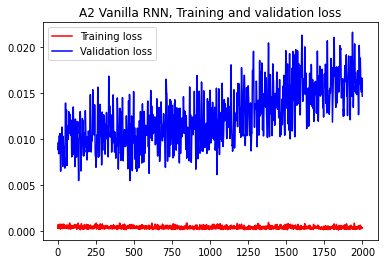

<Figure size 432x288 with 0 Axes>

In [85]:
loss = history_vnla_A2.history['loss']
val_loss = history_vnla_A2.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('A2 Vanilla RNN, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [86]:
train_predict_vnla_A2=model_vnla.predict(X_train_Kalbe_A2)
test_predict_vnla_A2=model_vnla.predict(X_test_Kalbe_A2)
train_predict_vnla_A2.shape, test_predict_vnla_A2.shape

1/1 [==============================] - 0s 24ms/step


((39, 1), (21, 1))

###### IV.2.6.1.3.3 B1 Vanilla RNN

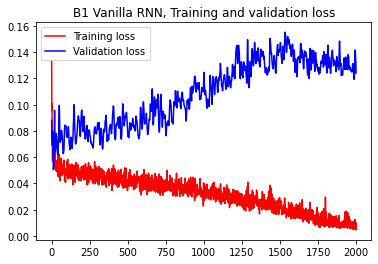

<Figure size 432x288 with 0 Axes>

In [87]:
loss = history_vnla_B1.history['loss']
val_loss = history_vnla_B1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('B1 Vanilla RNN, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [88]:
train_predict_vnla_B1=model_vnla.predict(X_train_Kalbe_B1)
test_predict_vnla_B1=model_vnla.predict(X_test_Kalbe_B1)
train_predict_vnla_B1.shape, test_predict_vnla_B1.shape

1/1 [==============================] - 0s 45ms/step


((39, 1), (21, 1))

###### IV.2.6.1.3.4 B2 Vanilla RNN

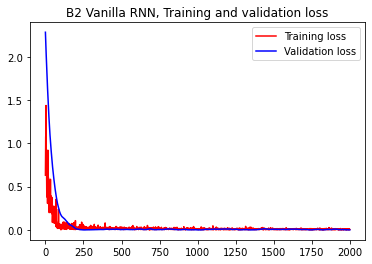

<Figure size 432x288 with 0 Axes>

In [89]:
loss = history_vnla_B2.history['loss']
val_loss = history_vnla_B2.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('B2 Vanilla RNN, Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [90]:
train_predict_vnla_B2=model_vnla_B2.predict(X_train_Kalbe_B2)
test_predict_vnla_B2=model_vnla_B2.predict(X_test_Kalbe_B2)
train_predict_vnla_B2.shape, test_predict_vnla_B2.shape

1/1 [==============================] - 0s 25ms/step


((7, 1), (1, 1))

#### IV.2.6.2 Inverse Transform

##### IV.2.6.2.1 LSTM

###### IV.2.6.2.1.1 A1 LSTM

In [91]:
# Transform back to original form

train_predict_lstm_A1 = scaler.inverse_transform(train_predict_lstm_A1)
test_predict_lstm_A1 = scaler.inverse_transform(test_predict_lstm_A1)
original_ytrain_lstm_A1 = scaler.inverse_transform(y_train_Kalbe_A1.reshape(-1,1)) 
original_ytest_lstm_A1 = scaler.inverse_transform(y_test_Kalbe_A1.reshape(-1,1)) 

###### IV.2.6.2.1.2 A2 LSTM

In [92]:
train_predict_lstm_A2 = scaler.inverse_transform(train_predict_lstm_A2)
test_predict_lstm_A2 = scaler.inverse_transform(test_predict_lstm_A2)
original_ytrain_lstm_A2 = scaler.inverse_transform(y_train_Kalbe_A2.reshape(-1,1)) 
original_ytest_lstm_A2 = scaler.inverse_transform(y_test_Kalbe_A2.reshape(-1,1)) 

###### IV.2.6.2.1.3 B1 LSTM

In [93]:
train_predict_lstm_B1 = scaler.inverse_transform(train_predict_lstm_B1)
test_predict_lstm_B1 = scaler.inverse_transform(test_predict_lstm_B1)
original_ytrain_lstm_B1 = scaler.inverse_transform(y_train_Kalbe_B1.reshape(-1,1)) 
original_ytest_lstm_B1 = scaler.inverse_transform(y_test_Kalbe_B1.reshape(-1,1)) 

###### IV.2.6.2.1.4 B2 LSTM

In [94]:
train_predict_lstm_B2 = scaler.inverse_transform(train_predict_lstm_B2)
test_predict_lstm_B2 = scaler.inverse_transform(test_predict_lstm_B2)
original_ytrain_lstm_B2 = scaler.inverse_transform(y_train_Kalbe_B2.reshape(-1,1)) 
original_ytest_lstm_B2 = scaler.inverse_transform(y_test_Kalbe_B2.reshape(-1,1)) 

##### IV.2.6.2.2 GRU

###### IV.2.6.2.2.1 A1 GRU

In [95]:
train_predict_gru_A1 = scaler.inverse_transform(train_predict_gru_A1)
test_predict_gru_A1 = scaler.inverse_transform(test_predict_gru_A1)
original_ytrain_gru_A1 = scaler.inverse_transform(y_train_Kalbe_A1.reshape(-1,1)) 
original_ytest_gru_A1 = scaler.inverse_transform(y_test_Kalbe_A1.reshape(-1,1)) 

###### IV.2.6.2.2.2 A2 GRU

In [96]:
train_predict_gru_A2 = scaler.inverse_transform(train_predict_gru_A2)
test_predict_gru_A2 = scaler.inverse_transform(test_predict_gru_A2)
original_ytrain_gru_A2 = scaler.inverse_transform(y_train_Kalbe_A2.reshape(-1,1)) 
original_ytest_gru_A2 = scaler.inverse_transform(y_test_Kalbe_A2.reshape(-1,1)) 

###### IV.2.6.2.2.3 B1 GRU

In [97]:
train_predict_gru_B1 = scaler.inverse_transform(train_predict_gru_B1)
test_predict_gru_B1 = scaler.inverse_transform(test_predict_gru_B1)
original_ytrain_gru_B1 = scaler.inverse_transform(y_train_Kalbe_B1.reshape(-1,1)) 
original_ytest_gru_B1 = scaler.inverse_transform(y_test_Kalbe_B1.reshape(-1,1)) 

###### IV.2.6.2.2.4 B2 GRU

In [98]:
train_predict_gru_B2 = scaler.inverse_transform(train_predict_gru_B2)
test_predict_gru_B2 = scaler.inverse_transform(test_predict_gru_B2)
original_ytrain_gru_B2 = scaler.inverse_transform(y_train_Kalbe_B2.reshape(-1,1)) 
original_ytest_gru_B2 = scaler.inverse_transform(y_test_Kalbe_B2.reshape(-1,1)) 

##### IV.2.6.2.2 Vanilla RNN

###### IV.2.6.2.3.1 A1 Vanilla RNN

In [99]:
train_predict_vnla_A1 = scaler.inverse_transform(train_predict_vnla_A1)
test_predict_vnla_A1 = scaler.inverse_transform(test_predict_vnla_A1)
original_ytrain_vnla_A1 = scaler.inverse_transform(y_train_Kalbe_A1.reshape(-1,1)) 
original_ytest_vnla_A1 = scaler.inverse_transform(y_test_Kalbe_A1.reshape(-1,1))

###### IV.2.6.2.3.2 A2 Vanilla RNN

In [100]:
train_predict_vnla_A2 = scaler.inverse_transform(train_predict_vnla_A2)
test_predict_vnla_A2 = scaler.inverse_transform(test_predict_vnla_A2)
original_ytrain_vnla_A2 = scaler.inverse_transform(y_train_Kalbe_A2.reshape(-1,1)) 
original_ytest_vnla_A2 = scaler.inverse_transform(y_test_Kalbe_A2.reshape(-1,1))

###### IV.2.6.2.3.3 B1 Vanilla RNN

In [101]:
train_predict_vnla_B1 = scaler.inverse_transform(train_predict_vnla_B1)
test_predict_vnla_B1 = scaler.inverse_transform(test_predict_vnla_B1)
original_ytrain_vnla_B1 = scaler.inverse_transform(y_train_Kalbe_B1.reshape(-1,1)) 
original_ytest_vnla_B1 = scaler.inverse_transform(y_test_Kalbe_B1.reshape(-1,1))

###### IV.2.6.2.3.4 B2 Vanilla RNN

In [102]:
train_predict_vnla_B2 = scaler.inverse_transform(train_predict_vnla_B2)
test_predict_vnla_B2 = scaler.inverse_transform(test_predict_vnla_B2)
original_ytrain_vnla_B2 = scaler.inverse_transform(y_train_Kalbe_B2.reshape(-1,1)) 
original_ytest_vnla_B2 = scaler.inverse_transform(y_test_Kalbe_B2.reshape(-1,1))

#### IV.2.6.3 Evaluation RMSE, MSE, MAE, Explained Variance Regression Score, R2 score for regression, MGD, and MPD

##### IV.2.6.3.1 LSTM

###### IV.2.6.3.1.1 A1 LSTM

In [104]:
import math

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 

In [106]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_lstm_A1,train_predict_lstm_A1)))
print("Train data MSE: ", mean_squared_error(original_ytrain_lstm_A1,train_predict_lstm_A1))
print("Train data MAE: ", mean_absolute_error(original_ytrain_lstm_A1,train_predict_lstm_A1))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_lstm_A1,test_predict_lstm_A1)))
print("Test data MSE: ", mean_squared_error(original_ytest_lstm_A1,test_predict_lstm_A1))
print("Test data MAE: ", mean_absolute_error(original_ytest_lstm_A1,test_predict_lstm_A1))

Train data RMSE:  2259.4690998053284
Train data MSE:  5105200.612975101
Train data MAE:  1819.1903944743717
-------------------------------------------------------------------------------------
Test data RMSE:  5727.0282387786265
Test data MSE:  32798852.44776782
Test data MAE:  5714.1272807558535


In [107]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_lstm_A1, train_predict_lstm_A1))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_lstm_A1, test_predict_lstm_A1))

Train data explained variance regression score: -3.8795470032298756
Test data explained variance regression score: -0.1586157334534597


###### IV.2.6.3.1.2 A2 LSTM

In [111]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_lstm_A2,train_predict_lstm_A2)))
print("Train data MSE: ", mean_squared_error(original_ytrain_lstm_A2,train_predict_lstm_A2))
print("Train data MAE: ", mean_absolute_error(original_ytrain_lstm_A2,train_predict_lstm_A2))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_lstm_A2,test_predict_lstm_A2)))
print("Test data MSE: ", mean_squared_error(original_ytest_lstm_A2,test_predict_lstm_A2))
print("Test data MAE: ", mean_absolute_error(original_ytest_lstm_A2,test_predict_lstm_A2))

Train data RMSE:  2272.3514591279736
Train data MSE:  5163581.1538010305
Train data MAE:  1855.1268232055538
-------------------------------------------------------------------------------------
Test data RMSE:  5961.361468388019
Test data MSE:  35537830.55678135
Test data MAE:  5944.2219970172755


In [112]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_lstm_A2, train_predict_lstm_A2))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_lstm_A2, test_predict_lstm_A2))

Train data explained variance regression score: -3.9971627953942637
Test data explained variance regression score: -0.2603105218977986


###### IV.2.6.3.1.3 B1 LSTM

In [114]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_lstm_B1,train_predict_lstm_B1)))
print("Train data MSE: ", mean_squared_error(original_ytrain_lstm_B1,train_predict_lstm_B1))
print("Train data MAE: ", mean_absolute_error(original_ytrain_lstm_B1,train_predict_lstm_B1))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_lstm_B1,test_predict_lstm_B1)))
print("Test data MSE: ", mean_squared_error(original_ytest_lstm_B1,test_predict_lstm_B1))
print("Test data MAE: ", mean_absolute_error(original_ytest_lstm_B1,test_predict_lstm_B1))

Train data RMSE:  1118.5833853003865
Train data MSE:  1251228.7898700729
Train data MAE:  562.3565890638595
-------------------------------------------------------------------------------------
Test data RMSE:  877.731321240612
Test data MSE:  770412.2722867905
Test data MAE:  547.7150582915605


In [115]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_lstm_B1, train_predict_lstm_B1))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_lstm_B1, test_predict_lstm_B1))

Train data explained variance regression score: 0.29241987369982947
Test data explained variance regression score: 0.18665058970190274


###### IV.2.6.3.1.4 B2 LSTM

In [117]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_lstm_B1,train_predict_lstm_B1)))
print("Train data MSE: ", mean_squared_error(original_ytrain_lstm_B1,train_predict_lstm_B1))
print("Train data MAE: ", mean_absolute_error(original_ytrain_lstm_B1,train_predict_lstm_B1))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_lstm_B1,test_predict_lstm_B1)))
print("Test data MSE: ", mean_squared_error(original_ytest_lstm_B1,test_predict_lstm_B1))
print("Test data MAE: ", mean_absolute_error(original_ytest_lstm_B1,test_predict_lstm_B1))

Train data RMSE:  1118.5833853003865
Train data MSE:  1251228.7898700729
Train data MAE:  562.3565890638595
-------------------------------------------------------------------------------------
Test data RMSE:  877.731321240612
Test data MSE:  770412.2722867905
Test data MAE:  547.7150582915605


In [118]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_lstm_B1, train_predict_lstm_B1))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_lstm_B1, test_predict_lstm_B1))

Train data explained variance regression score: 0.29241987369982947
Test data explained variance regression score: 0.18665058970190274


##### IV.2.6.3.2 GRU

###### IV.2.6.3.2.1 A1 GRU

In [120]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_gru_A1,train_predict_gru_A1)))
print("Train data MSE: ", mean_squared_error(original_ytrain_gru_A1,train_predict_gru_A1))
print("Train data MAE: ", mean_absolute_error(original_ytrain_gru_A1,train_predict_gru_A1))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_gru_A1,test_predict_gru_A1)))
print("Test data MSE: ", mean_squared_error(original_ytest_gru_A1,test_predict_gru_A1))
print("Test data MAE: ", mean_absolute_error(original_ytest_gru_A1,test_predict_gru_A1))

Train data RMSE:  1987.1214595949407
Train data MSE:  3948651.6951827276
Train data MAE:  1929.6874682088721
-------------------------------------------------------------------------------------
Test data RMSE:  4215.45758435646
Test data MSE:  17770082.645508397
Test data MAE:  4198.125917092408


In [121]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_gru_A1, train_predict_gru_A1))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_gru_A1, test_predict_gru_A1))

Train data explained variance regression score: -8.18025836495157
Test data explained variance regression score: -0.14464001105925894


###### IV.2.6.3.2.2 A2 GRU

In [123]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_gru_A2,train_predict_gru_A2)))
print("Train data MSE: ", mean_squared_error(original_ytrain_gru_A2,train_predict_gru_A2))
print("Train data MAE: ", mean_absolute_error(original_ytrain_gru_A2,train_predict_gru_A2))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_gru_A2,test_predict_gru_A2)))
print("Test data MSE: ", mean_squared_error(original_ytest_gru_A2,test_predict_gru_A2))
print("Test data MAE: ", mean_absolute_error(original_ytest_gru_A2,test_predict_gru_A2))

Train data RMSE:  1921.471821667753
Train data MSE:  3692053.9614631925
Train data MAE:  1845.4990297360207
-------------------------------------------------------------------------------------
Test data RMSE:  4437.92510299301
Test data MSE:  19695179.219775517
Test data MAE:  4416.303232448765


In [124]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_gru_A2, train_predict_gru_A2))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_gru_A2, test_predict_gru_A2))

Train data explained variance regression score: -8.552220678230867
Test data explained variance regression score: -0.18242454239230432


###### IV.2.6.3.2.3 B1 GRU

In [126]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_gru_B1,train_predict_gru_B1)))
print("Train data MSE: ", mean_squared_error(original_ytrain_gru_B1,train_predict_gru_B1))
print("Train data MAE: ", mean_absolute_error(original_ytrain_gru_B1,train_predict_gru_B1))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_gru_B1,test_predict_gru_B1)))
print("Test data MSE: ", mean_squared_error(original_ytest_gru_B1,test_predict_gru_B1))
print("Test data MAE: ", mean_absolute_error(original_ytest_gru_B1,test_predict_gru_B1))

Train data RMSE:  685.3340181067334
Train data MSE:  469682.7163743204
Train data MAE:  337.5218222359377
-------------------------------------------------------------------------------------
Test data RMSE:  1918.0223265275781
Test data MSE:  3678809.645058263
Test data MAE:  1352.515448478205


In [127]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_gru_B1, train_predict_gru_B1))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_gru_B1, test_predict_gru_B1))

Train data explained variance regression score: 0.7343653713843141
Test data explained variance regression score: -1.8447032854718342


###### IV.2.6.3.2.4 B2 GRU

In [129]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_gru_B2,train_predict_gru_B2)))
print("Train data MSE: ", mean_squared_error(original_ytrain_gru_B2,train_predict_gru_B2))
print("Train data MAE: ", mean_absolute_error(original_ytrain_gru_B2,train_predict_gru_B2))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_gru_B2,test_predict_gru_B2)))
print("Test data MSE: ", mean_squared_error(original_ytest_gru_B2,test_predict_gru_B2))
print("Test data MAE: ", mean_absolute_error(original_ytest_gru_B2,test_predict_gru_B2))

Train data RMSE:  141.47360609060684
Train data MSE:  20014.78122028019
Train data MAE:  120.60737154017852
-------------------------------------------------------------------------------------
Test data RMSE:  646.3212890625
Test data MSE:  417731.2086954117
Test data MAE:  646.3212890625


In [130]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_gru_B2, train_predict_gru_B2))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_gru_B2, test_predict_gru_B2))

Train data explained variance regression score: 0.9819579075899949
Test data explained variance regression score: 1.0


##### IV.2.6.3.3 Vanilla RNN

###### IV.2.6.3.3.1 A1 Vanilla RNN

In [131]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_vnla_A1,train_predict_vnla_A1)))
print("Train data MSE: ", mean_squared_error(original_ytrain_vnla_A1,train_predict_vnla_A1))
print("Train data MAE: ", mean_absolute_error(original_ytrain_vnla_A1,train_predict_vnla_A1))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_vnla_A1,test_predict_vnla_A1)))
print("Test data MSE: ", mean_squared_error(original_ytest_vnla_A1,test_predict_vnla_A1))
print("Test data MAE: ", mean_absolute_error(original_ytest_vnla_A1,test_predict_vnla_A1))

Train data RMSE:  1726.4717229339697
Train data MSE:  2980704.6100905896
Train data MAE:  1417.461931001454
-------------------------------------------------------------------------------------
Test data RMSE:  4755.011951985603
Test data MSE:  22610138.66352594
Test data MAE:  4737.468470185727


In [132]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_vnla_A1, train_predict_vnla_A1))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_vnla_A1, test_predict_vnla_A1))

Train data explained variance regression score: -1.4083225678875704
Test data explained variance regression score: -0.30720310670744966


###### IV.2.6.3.3.2 A2 Vanilla RNN

In [133]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_vnla_A2,train_predict_vnla_A2)))
print("Train data MSE: ", mean_squared_error(original_ytrain_vnla_A2,train_predict_vnla_A2))
print("Train data MAE: ", mean_absolute_error(original_ytrain_vnla_A2,train_predict_vnla_A2))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_vnla_A2,test_predict_vnla_A2)))
print("Test data MSE: ", mean_squared_error(original_ytest_vnla_A2,test_predict_vnla_A2))
print("Test data MAE: ", mean_absolute_error(original_ytest_vnla_A2,test_predict_vnla_A2))

Train data RMSE:  1760.4147509536226
Train data MSE:  3099060.0953751053
Train data MAE:  1450.8823490038392
-------------------------------------------------------------------------------------
Test data RMSE:  4952.88851831501
Test data MSE:  24531104.674856648
Test data MAE:  4938.032695026947


In [134]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_vnla_A2, train_predict_vnla_A2))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_vnla_A2, test_predict_vnla_A2))

Train data explained variance regression score: -1.8363483946131112
Test data explained variance regression score: 0.09246596273586505


###### IV.2.6.3.3.3 B1 Vanilla RNN

In [135]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_vnla_B1,train_predict_vnla_B1)))
print("Train data MSE: ", mean_squared_error(original_ytrain_vnla_B1,train_predict_vnla_B1))
print("Train data MAE: ", mean_absolute_error(original_ytrain_vnla_B1,train_predict_vnla_B1))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_vnla_B1,test_predict_vnla_B1)))
print("Test data MSE: ", mean_squared_error(original_ytest_vnla_B1,test_predict_vnla_B1))
print("Test data MAE: ", mean_absolute_error(original_ytest_vnla_B1,test_predict_vnla_B1))

Train data RMSE:  307.7661402194576
Train data MSE:  94719.99706558284
Train data MAE:  223.20956814947306
-------------------------------------------------------------------------------------
Test data RMSE:  1751.602694550827
Test data MSE:  3068111.9995577177
Test data MAE:  1070.0810047688972


In [136]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_vnla_B1, train_predict_vnla_B1))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_vnla_B1, test_predict_vnla_B1))

Train data explained variance regression score: 0.9499205305947169
Test data explained variance regression score: -2.222617040448136


###### IV.2.6.3.3.4 B2 Vanilla RNN

In [137]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_vnla_B2,train_predict_vnla_B2)))
print("Train data MSE: ", mean_squared_error(original_ytrain_vnla_B2,train_predict_vnla_B2))
print("Train data MAE: ", mean_absolute_error(original_ytrain_vnla_B2,train_predict_vnla_B2))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_vnla_B2,test_predict_vnla_B2)))
print("Test data MSE: ", mean_squared_error(original_ytest_vnla_B2,test_predict_vnla_B2))
print("Test data MAE: ", mean_absolute_error(original_ytest_vnla_B2,test_predict_vnla_B2))

Train data RMSE:  263.99584526579196
Train data MSE:  69693.80631759997
Train data MAE:  231.44860362723213
-------------------------------------------------------------------------------------
Test data RMSE:  138.3369140625
Test data MSE:  19137.10179233551
Test data MAE:  138.3369140625


In [138]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_vnla_B2, train_predict_vnla_B2))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_vnla_B2, test_predict_vnla_B2))

Train data explained variance regression score: 0.9339632193268843
Test data explained variance regression score: 1.0


#### IV.2.6.4 Comparison of original sales and predicted sales

##### IV.2.6.4.1 LSTM

##### IV.2.6.4.1.1 A1 LSTM

In [140]:
from itertools import cycle

In [152]:
look_back =  time_pred
train_pred_plot = np.empty_like(df_Kalbe_A1_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_lstm_A1)+look_back, :] = train_predict_lstm_A1
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_A1_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_lstm_A1)+(look_back*2)+1:len(df_Kalbe_A1_sls_scld)-1, :] = test_predict_lstm_A1
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_A1['Day'],
                        'original_sales':df_Kalbe_A1['Sales'],
                        'train_predict_lstm_A1_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_lstm_A1_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='A1 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (90, 1)
Test predicted data: (90, 1)


##### IV.2.6.4.1.2 A2 LSTM

In [143]:
look_back =  time_pred
train_pred_plot = np.empty_like(df_Kalbe_A2_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_lstm_A2)+look_back, :] = train_predict_lstm_A2
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_A2_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_lstm_A2)+(look_back*2)+1:len(df_Kalbe_A2_sls_scld)-1, :] = test_predict_lstm_A2
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_A2['Day'],
                        'original_sales':df_Kalbe_A2['Sales'],
                        'train_predict_lstm_A2ed_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_lstm_A2ed_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='A2 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (90, 1)
Test predicted data: (90, 1)


##### IV.2.6.4.1.3 B1 LSTM

In [149]:
look_back =  time_pred
train_pred_plot = np.empty_like(df_Kalbe_B1_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_lstm_B1)+look_back, :] = train_predict_lstm_B1
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_B1_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_lstm_B1)+(look_back*2)+1:len(df_Kalbe_B1_sls_scld)-1, :] = test_predict_lstm_B1
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_B1_cln['Day'],
                        'original_sales':df_Kalbe_B1_cln['Sales'],
                        'train_predict_lstm_B1ed_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_lstm_B1ed_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='B1 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (90, 1)
Test predicted data: (90, 1)


##### IV.2.6.4.1.3 B2 LSTM

In [150]:
look_back =  time_pred_B2
train_pred_plot = np.empty_like(df_Kalbe_B2_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_lstm_B2)+look_back, :] = train_predict_lstm_B2
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_B2_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_lstm_B2)+(look_back*2)+1:len(df_Kalbe_B2_sls_scld)-1, :] = test_predict_lstm_B2
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_B2_cln['Day'],
                        'original_sales':df_Kalbe_B2_cln['Sales'],
                        'train_predict_lstm_B2_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_lstm_B2_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='B2 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (30, 1)
Test predicted data: (30, 1)


##### IV.2.6.4.2 GRU

##### IV.2.6.4.2.1 A1 GRU

In [154]:
look_back =  time_pred
train_pred_plot = np.empty_like(df_Kalbe_A1_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_gru_A1)+look_back, :] = train_predict_gru_A1
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_A1_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_gru_A1)+(look_back*2)+1:len(df_Kalbe_A1_sls_scld)-1, :] = test_predict_gru_A1
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_A1['Day'],
                        'original_sales':df_Kalbe_A1['Sales'],
                        'train_predict_gru_A1_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_gru_A1_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='A1 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (90, 1)
Test predicted data: (90, 1)


##### IV.2.6.4.2.2 A2 GRU

In [155]:
look_back =  time_pred
train_pred_plot = np.empty_like(df_Kalbe_A2_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_gru_A2)+look_back, :] = train_predict_gru_A2
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_A2_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_gru_A2)+(look_back*2)+1:len(df_Kalbe_A2_sls_scld)-1, :] = test_predict_gru_A2
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_A2['Day'],
                        'original_sales':df_Kalbe_A2['Sales'],
                        'train_predict_gru_A2_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_gru_A2_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='A2 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (90, 1)
Test predicted data: (90, 1)


##### IV.2.6.4.2.3 B1 GRU

In [156]:
look_back =  time_pred
train_pred_plot = np.empty_like(df_Kalbe_B1_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_gru_B1)+look_back, :] = train_predict_gru_B1
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_B1_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_gru_B1)+(look_back*2)+1:len(df_Kalbe_B1_sls_scld)-1, :] = test_predict_gru_B1
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_B1_cln['Day'],
                        'original_sales':df_Kalbe_B1_cln['Sales'],
                        'train_predict_gru_B1_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_gru_B1_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='B1 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (90, 1)
Test predicted data: (90, 1)


##### IV.2.6.4.2.4 B2 GRU

In [157]:
look_back =  time_pred_B2
train_pred_plot = np.empty_like(df_Kalbe_B2_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_gru_B2)+look_back, :] = train_predict_gru_B2
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_B2_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_gru_B2)+(look_back*2)+1:len(df_Kalbe_B2_sls_scld)-1, :] = test_predict_gru_B2
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_B2_cln['Day'],
                        'original_sales':df_Kalbe_B2_cln['Sales'],
                        'train_predict_gru_B2_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_gru_B2_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='B2 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (30, 1)
Test predicted data: (30, 1)


##### IV.2.6.4.3 Vanilla RNN

###### IV.2.6.4.3.1 A1 Vanilla RNN

In [158]:
look_back =  time_pred
train_pred_plot = np.empty_like(df_Kalbe_A1_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_vnla_A1)+look_back, :] = train_predict_vnla_A1
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_A1_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_vnla_A1)+(look_back*2)+1:len(df_Kalbe_A1_sls_scld)-1, :] = test_predict_vnla_A1
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_A1['Day'],
                        'original_sales':df_Kalbe_A1['Sales'],
                        'train_predict_vnla_A1_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_vnla_A1_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='A1 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (90, 1)
Test predicted data: (90, 1)


###### IV.2.6.4.3.2 A2 Vanilla RNN

In [159]:
look_back =  time_pred
train_pred_plot = np.empty_like(df_Kalbe_A2_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_vnla_A2)+look_back, :] = train_predict_vnla_A2
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_A2_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_vnla_A2)+(look_back*2)+1:len(df_Kalbe_A2_sls_scld)-1, :] = test_predict_vnla_A2
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_A2['Day'],
                        'original_sales':df_Kalbe_A2['Sales'],
                        'train_predict_vnla_A2_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_vnla_A2_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='A2 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (90, 1)
Test predicted data: (90, 1)


###### IV.2.6.4.3.3 B1 Vanilla RNN

In [160]:
look_back =  time_pred
train_pred_plot = np.empty_like(df_Kalbe_B1_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_vnla_B1)+look_back, :] = train_predict_vnla_B1
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_B1_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_vnla_B1)+(look_back*2)+1:len(df_Kalbe_B1_sls_scld)-1, :] = test_predict_vnla_B1
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_B1_cln['Day'],
                        'original_sales':df_Kalbe_B1_cln['Sales'],
                        'train_predict_vnla_B1_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_vnla_B1_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='B1 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (90, 1)
Test predicted data: (90, 1)


###### IV.2.6.4.3.4 B2 Vanilla RNN

In [161]:
look_back =  time_pred_B2
train_pred_plot = np.empty_like(df_Kalbe_B2_sls_scld)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back:len(train_predict_vnla_B2)+look_back, :] = train_predict_vnla_B2
print("Train predicted data:", train_pred_plot.shape)

test_pred_plot = np.empty_like(df_Kalbe_B2_sls_scld)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_predict_vnla_B2)+(look_back*2)+1:len(df_Kalbe_B2_sls_scld)-1, :] = test_predict_vnla_B2
print("Test predicted data:", test_pred_plot.shape)

names = cycle(['original sales','Train predicted sales','Test predicted sales'])

plot_df = pd.DataFrame({'Day':df_Kalbe_B2_cln['Day'],
                        'original_sales':df_Kalbe_B2_cln['Sales'],
                        'train_predict_vnla_B2_sales': train_pred_plot.reshape(1,-1)[0].tolist(),
                        'Test_predicted_sales': test_pred_plot.reshape(1,-1)[0].tolist()})

fig = px.line(plot_df['Day'], y=[plot_df['original_sales'],plot_df['train_predict_vnla_B2_sales'],
                                  plot_df['Test_predicted_sales']],
              labels={'value':'Sales','index': 'Day'})
fig.update_layout(title_text='Comparison between original sales vs predicted sales',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='B2 Sales')
fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

Train predicted data: (30, 1)
Test predicted data: (30, 1)


#### IV.2.6.5 Conclusion

Dari 3 model neural network, model GRU mempunyai RMSE paling rendah. Sehinga saya memilih model GRU untuk dilanjutkan ke tahapan prediksi.

### IV.2.7 Predicting

#### IV.2.7.1 Predicting next 14 days

#### IV.2.7.1.1 A1

In [166]:
x_input = test_data_Kalbe_A1[len(test_data_Kalbe_A1)-time_pred:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps = time_pred
i = 0
pred_days = 14
while(i<pred_days):
  if(len(temp_input)>time_pred):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))

    yhat = model_gru.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    print(temp_input)

    lst_output.extend(yhat.tolist())
    i=i+1

  else:

    x_input = x_input.reshape((1, n_steps,1))
    yhat = model_gru.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())

    lst_output.extend(yhat.tolist())
    i=i+1
  
  print("Output of predicted next days:", len(lst_output))

Output of predicted next days: 1
1 day input [ 0.79090909  0.79940909  0.80795159  0.8165368   0.82516494  0.83383622
  1.          0.87272727  0.88163636  0.89059     0.8995884   0.9086318
  0.91772041 -0.03830352]
1 day output [[-0.03086336]]
[0.7909090909090909, 0.7994090909090906, 0.8079515909090905, 0.8165368034090902, 0.82516494197159, 0.8338362212269025, 0.9999999999999999, 0.8727272727272727, 0.8816363636363634, 0.8905899999999997, 0.899588404545454, 0.9086318011136357, 0.9177204146646584, -0.038303524255752563, -0.030863359570503235]
Output of predicted next days: 2
2 day input [ 0.79940909  0.80795159  0.8165368   0.82516494  0.83383622  1.
  0.87272727  0.88163636  0.89059     0.8995884   0.9086318   0.91772041
 -0.03830352 -0.03086336]
2 day output [[-0.02683708]]
[0.7994090909090906, 0.8079515909090905, 0.8165368034090902, 0.82516494197159, 0.8338362212269025, 0.9999999999999999, 0.8727272727272727, 0.8816363636363634, 0.8905899999999997, 0.899588404545454, 0.9086318011136

In [167]:
last_days=np.arange(1,time_pred+1)
day_pred=np.arange(time_pred+1,time_pred+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24 25 26 27 28]


In [168]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

In [169]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_pred+1] = scaler.inverse_transform(df_Kalbe_A1_sls_scld[len(df_Kalbe_A1_sls_scld)-time_pred:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_pred+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 13 days sales','Predicted next 14 days sales'])

fig = px.line(new_pred_plot, x = new_pred_plot.index, y = [new_pred_plot['last_original_days_value'],
                                                           new_pred_plot['next_predicted_days_value']],
              labels = {'value':'A1 Sales','index':'Timestamp'})
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

#### IV.2.7.1.2 A2

In [170]:
x_input = test_data_Kalbe_A2[len(test_data_Kalbe_A2)-time_pred:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps = time_pred
i = 0
pred_days = 14
while(i<pred_days):
  if(len(temp_input)>time_pred):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))

    yhat = model_gru.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    print(temp_input)

    lst_output.extend(yhat.tolist())
    i=i+1

  else:

    x_input = x_input.reshape((1, n_steps,1))
    yhat = model_gru.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())

    lst_output.extend(yhat.tolist())
    i=i+1
  
  print("Output of predicted next days:", len(lst_output))

Output of predicted next days: 1
1 day input [ 0.83793482  0.85107286  0.8642766   0.87754635  0.89088246  0.90428524
  0.99829038  0.93129219  0.94489702  0.95856987  0.9723111   0.98612102
  1.         -0.04443739]
1 day output [[-0.03714073]]
[0.8379348167217084, 0.8510728625099031, 0.8642765985270391, 0.8775463532242604, 0.8908824566949678, 0.9042852406830291, 0.9982903839323087, 0.9312921854885718, 0.9448970181206009, 0.9585698749157905, 0.9723110959949552, 0.9861210231795161, 0.9999999999999998, -0.04443739354610443, -0.037140727043151855]
Output of predicted next days: 2
2 day input [ 0.85107286  0.8642766   0.87754635  0.89088246  0.90428524  0.99829038
  0.93129219  0.94489702  0.95856987  0.9723111   0.98612102  1.
 -0.04443739 -0.03714073]
2 day output [[-0.03359491]]
[0.8510728625099031, 0.8642765985270391, 0.8775463532242604, 0.8908824566949678, 0.9042852406830291, 0.9982903839323087, 0.9312921854885718, 0.9448970181206009, 0.9585698749157905, 0.9723110959949552, 0.9861210

In [171]:
last_days=np.arange(1,time_pred+1)
day_pred=np.arange(time_pred+1,time_pred+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24 25 26 27 28]


In [172]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

In [174]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_pred+1] = scaler.inverse_transform(df_Kalbe_A2_sls_scld[len(df_Kalbe_A2_sls_scld)-time_pred:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_pred+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 13 days sales','Predicted next 14 days sales'])

fig = px.line(new_pred_plot, x = new_pred_plot.index, y = [new_pred_plot['last_original_days_value'],
                                                           new_pred_plot['next_predicted_days_value']],
              labels = {'value':'A2 Sales','index':'Timestamp'})
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

#### IV.2.7.1.3 B1

In [175]:
x_input = test_data_Kalbe_B1[len(test_data_Kalbe_B1)-time_pred:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps = time_pred
i = 0
pred_days = 14
while(i<pred_days):
  if(len(temp_input)>time_pred):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))

    yhat = model_gru.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    print(temp_input)

    lst_output.extend(yhat.tolist())
    i=i+1

  else:

    x_input = x_input.reshape((1, n_steps,1))
    yhat = model_gru.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())

    lst_output.extend(yhat.tolist())
    i=i+1
  
  print("Output of predicted next days:", len(lst_output))

Output of predicted next days: 1
1 day input [0.02617801 0.06544503 0.06544503 0.06544503 0.02617801 0.06544503
 0.01308901 0.01308901 0.05235602 0.06544503 0.63481675 0.05235602
 0.02617801 0.84057713]
1 day output [[0.08670646]]
[0.026178010471204383, 0.06544502617801062, 0.06544502617801062, 0.06544502617801062, 0.026178010471204383, 0.06544502617801062, 0.013089005235602302, 0.013089005235602302, 0.05235602094240854, 0.06544502617801062, 0.6348167539267018, 0.05235602094240854, 0.026178010471204383, 0.8405771255493164, 0.08670645952224731]
Output of predicted next days: 2
2 day input [0.06544503 0.06544503 0.06544503 0.02617801 0.06544503 0.01308901
 0.01308901 0.05235602 0.06544503 0.63481675 0.05235602 0.02617801
 0.84057713 0.08670646]
2 day output [[0.13303034]]
[0.06544502617801062, 0.06544502617801062, 0.06544502617801062, 0.026178010471204383, 0.06544502617801062, 0.013089005235602302, 0.013089005235602302, 0.05235602094240854, 0.06544502617801062, 0.6348167539267018, 0.0523

In [176]:
last_days=np.arange(1,time_pred+1)
day_pred=np.arange(time_pred+1,time_pred+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24 25 26 27 28]


In [177]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

In [178]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_pred+1] = scaler.inverse_transform(df_Kalbe_B1_sls_scld[len(df_Kalbe_B1_sls_scld)-time_pred:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_pred+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 13 days sales','Predicted next 14 days sales'])

fig = px.line(new_pred_plot, x = new_pred_plot.index, y = [new_pred_plot['last_original_days_value'],
                                                           new_pred_plot['next_predicted_days_value']],
              labels = {'value':'B1 Sales','index':'Timestamp'})
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

#### IV.2.7.1.4 B2

In [179]:
x_input = test_data_Kalbe_B1[len(test_data_Kalbe_B1)-time_pred_B2:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps = time_pred_B2
i = 0
pred_days = 10
while(i<pred_days):
  if(len(temp_input)>time_pred_B2):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))

    yhat = model_gru.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    print(temp_input)

    lst_output.extend(yhat.tolist())
    i=i+1

  else:

    x_input = x_input.reshape((1, n_steps,1))
    yhat = model_gru.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())

    lst_output.extend(yhat.tolist())
    i=i+1
  
  print("Output of predicted next days:", len(lst_output))

Output of predicted next days: 1
1 day input [0.02617801 0.06544503 0.01308901 0.01308901 0.05235602 0.06544503
 0.63481675 0.05235602 0.02617801 0.10455589]
1 day output [[0.04962444]]
[0.026178010471204383, 0.06544502617801062, 0.013089005235602302, 0.013089005235602302, 0.05235602094240854, 0.06544502617801062, 0.6348167539267018, 0.05235602094240854, 0.026178010471204383, 0.1045558899641037, 0.04962444305419922]
Output of predicted next days: 2
2 day input [0.06544503 0.01308901 0.01308901 0.05235602 0.06544503 0.63481675
 0.05235602 0.02617801 0.10455589 0.04962444]
2 day output [[0.13759512]]
[0.06544502617801062, 0.013089005235602302, 0.013089005235602302, 0.05235602094240854, 0.06544502617801062, 0.6348167539267018, 0.05235602094240854, 0.026178010471204383, 0.1045558899641037, 0.04962444305419922, 0.13759511709213257]
Output of predicted next days: 3
3 day input [0.01308901 0.01308901 0.05235602 0.06544503 0.63481675 0.05235602
 0.02617801 0.10455589 0.04962444 0.13759512]
3 d

In [180]:
last_days=np.arange(1,time_pred+1)
day_pred=np.arange(time_pred+1,time_pred+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


In [181]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

In [182]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_pred+1] = scaler.inverse_transform(df_Kalbe_B2_sls_scld[len(df_Kalbe_B2_sls_scld)-time_pred:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_pred+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 13 days sales','Predicted next 14 days sales'])

fig = px.line(new_pred_plot, x = new_pred_plot.index, y = [new_pred_plot['last_original_days_value'],
                                                           new_pred_plot['next_predicted_days_value']],
              labels = {'value':'B2 Sales','index':'Timestamp'})
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

#### IV.2.7.2 Plotting entire sales with next 14 days

##### IV.2.7.2.1 A1

In [183]:
plt_pred = df_Kalbe_A1_sls_scld.tolist()
plt_pred.extend((np.array(lst_output).reshape(-1,1)).tolist())
plt_pred=scaler.inverse_transform(plt_pred).reshape(1,-1).tolist()[0]

names = cycle(['A1 Sales'])

fig = px.line(plt_pred, labels={'value':'A1 Sales','index':'Day'})
fig.update_layout(title_text='Plotting whole A1 sales',
                  plot_bgcolor='white',font_size=15, font_color='black', legend_title='Sales')

fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

##### IV.2.7.2.1 A2

In [184]:
plt_pred = df_Kalbe_A2_sls_scld.tolist()
plt_pred.extend((np.array(lst_output).reshape(-1,1)).tolist())
plt_pred=scaler.inverse_transform(plt_pred).reshape(1,-1).tolist()[0]

names = cycle(['A2 Sales'])

fig = px.line(plt_pred, labels={'value':'A2 Sales','index':'Day'})
fig.update_layout(title_text='Plotting whole A2 sales',
                  plot_bgcolor='white',font_size=15, font_color='black', legend_title='Sales')

fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

##### IV.2.7.2.1 B1

In [185]:
plt_pred = df_Kalbe_B1_sls_scld.tolist()
plt_pred.extend((np.array(lst_output).reshape(-1,1)).tolist())
plt_pred=scaler.inverse_transform(plt_pred).reshape(1,-1).tolist()[0]

names = cycle(['B1 Sales'])

fig = px.line(plt_pred, labels={'value':'B1 Sales','index':'Day'})
fig.update_layout(title_text='Plotting whole B1 sales',
                  plot_bgcolor='white',font_size=15, font_color='black', legend_title='Sales')

fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

##### IV.2.7.2.1 B2

In [186]:
plt_pred = df_Kalbe_B2_sls_scld.tolist()
plt_pred.extend((np.array(lst_output).reshape(-1,1)).tolist())
plt_pred=scaler.inverse_transform(plt_pred).reshape(1,-1).tolist()[0]

names = cycle(['B2 Sales'])

fig = px.line(plt_pred, labels={'value':'B2 Sales','index':'Day'})
fig.update_layout(title_text='Plotting whole B2 sales',
                  plot_bgcolor='white',font_size=15, font_color='black', legend_title='Sales')

fig.for_each_trace(lambda t: t.update(name = next(names)))
fig.update_xaxes(showgrid=True, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridcolor='gray')
fig.show()

### IV.2.8 Conclusion

Prediksi mempunyai error yang tinggi dikarenakan proses training neural network yang mempunyai epoch 2000. Hal ini, dikarenakan keterbatasan waktu. Namun, jika epoch lebih besar lagi (epoch 4000) hasil akan lebih baik. Pengerjaan pada B2 juga hanya bisa meprediksi 10 hari dikarenakan keterbatasan data yang tersedia.

## IV.3. Aria

### IV.3.1 Objective/Expected Result


*   Able to forecast 14 days every products and categories from Kalbe’s dataset.
*   Your working model able to reach a good Accuracy Rate.
* Able to explain the methodology used for every step, algorithm, data manipulation, data cleansing, etc.
* Able to provide chart or any other measureable methods to prove your inferences.

<center>Akhir Bagian IV.3.2 Aria, Objective/Expected Result</center>
<hr>
<hr>

### IV.3.2 Data Loading

In [187]:
df_Aria = pd.read_excel('aria_data.xlsx')

<center>Akhir Bagian IV.3.2 Aria, Data Loading Aria</center>
<hr>
<hr>

### IV.3.3 Exploratory Data Analysis

#### IV.3.3.1. Viewing data head

In [188]:
df_Aria.head(4)

target          v1          v2          v3          v4          v5  \
0    4.63  260.600000  199.000000  391.333333  371.733333  466.800000   
1    5.00  263.200000  194.600000  393.666667  348.533333  401.800000   
2    4.91  247.266667  205.800000  375.466667  354.866667  419.000000   
3    4.77  257.944444  191.833333  368.722222  334.666667  417.222222   

           v6          v7           v8 sample_type  
0  273.133333  742.066667  4047.733333       lab 1  
1  220.066667  712.000000  4673.466667       lab 1  
2  222.133333  677.200000  4386.800000       lab 1  
3  195.944444  678.555556  4588.777778       lab 1

#### IV.3.3.2 Data Info

In [189]:
df_Aria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


#### IV.3.3.3 Null Values Observation

In [190]:
df_Aria.isna().sum().sort_values(ascending=False)

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

#### IV.3.3.4 Numerical Data Observation

In [191]:
df_Aria.describe().T

count         mean         std          min          25%          50%  \
target  160.0     4.733750    0.214050     4.130000     4.600000     4.720000   
v1      160.0   389.892437  148.673511   227.285714   268.608333   295.162500   
v2      160.0   237.442677   70.128690   178.800000   194.029018   204.187500   
v3      160.0   480.573041  118.798984   348.933333   384.419643   414.383929   
v4      160.0   394.109622   63.060442   313.733333   353.181250   370.741667   
v5      160.0   487.316520  100.941711   373.333333   418.583333   456.031250   
v6      160.0   251.450820   59.634652   189.200000   213.000000   226.062500   
v7      160.0   714.737926   51.148098   586.266667   678.385417   718.833333   
v8      160.0  4456.913233  335.035933  3725.666667  4273.437500  4554.766667   

                75%          max  
target     4.890000     5.260000  
v1       536.409375   678.375000  
v2       244.716667   422.812500  
v3       591.611404   722.312500  
v4       424.131250   558.500000  
v5       496.475000   721.000000  
v6       262.531250   415.375000  
v7       751.446875   853.466667  
v8      4700.612500  5086.375000

#### IV.3.3.5 Categorical Data Observation

In [192]:
df_Aria['sample_type'].value_counts().sort_values(ascending=False)

lab 1    100
lab 2     60
Name: sample_type, dtype: int64

#### IV.3.3.6 Data Distribution

In [193]:
df_Aria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


##### IV.3.3.6.1 Define Functions

##### IV.3.3.6.1.1 Define visualization function: diagnostic_histplot

In [194]:
# fungsi untuk menampilkan histogram dan boxplot

def diagnostic_histplots(data, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.show()

##### IV.3.3.6.1.2 Define Outlier visualization function: find_skewed_boundaries

In [195]:
# fungsi untuk menampilkan histogram dan boxplot

def diagnostic_plots(data, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature])
    plt.title('Boxplot')

    plt.show()

##### IV.3.3.6.2 Numeric Data Distribution Observation

###### IV.3.3.6.2.1 target

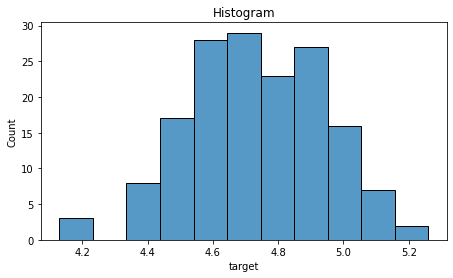


Nama variabel: target

Nilai Skewness:  -0.15828173643344287


In [196]:
# histogram dan boxplot kolom target

diagnostic_histplots(df_Aria, 'target')
print('\nNama variabel: target')
print('\nNilai Skewness: ', df_Aria['target'].skew())

###### IV.3.3.6.2.2 v1

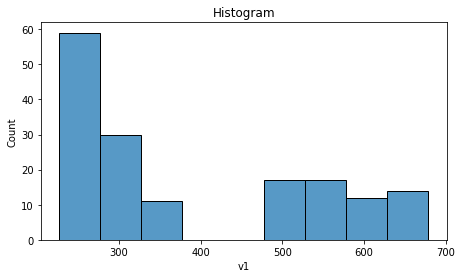


Nama variabel: v1

Nilai Skewness:  0.6399112607855549


In [197]:
# histogram dan boxplot kolom v1

diagnostic_histplots(df_Aria, 'v1')
print('\nNama variabel: v1')
print('\nNilai Skewness: ', df_Aria['v1'].skew())

###### IV.3.3.6.2.3 v2

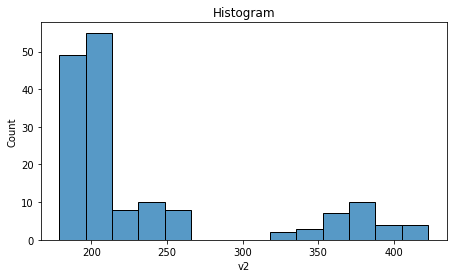


Nama variabel: v2

Nilai Skewness:  1.4617281099191999


In [198]:
# histogram dan boxplot kolom v2

diagnostic_histplots(df_Aria, 'v2')
print('\nNama variabel: v2')
print('\nNilai Skewness: ', df_Aria['v2'].skew())

#### IV.3.3.7 Conclusion

Terdapat beberapa data yang mempunyai cluster distrubusi yang berbeda.

### IV.3.4 Data Pre-Processing

#### IV.3.4.1 

### IV.3.4.2 Data Split

##### IV.3.4.2.1 Define feature and target

In [199]:
# mendefinisikan feature dan target

X = df_Aria.drop(columns='target', axis=1)
y = df_Aria['target']
X

v1          v2          v3          v4          v5          v6  \
0    260.600000  199.000000  391.333333  371.733333  466.800000  273.133333   
1    263.200000  194.600000  393.666667  348.533333  401.800000  220.066667   
2    247.266667  205.800000  375.466667  354.866667  419.000000  222.133333   
3    257.944444  191.833333  368.722222  334.666667  417.222222  195.944444   
4    258.200000  195.733333  356.666667  333.333333  394.600000  196.000000   
..          ...         ...         ...         ...         ...         ...   
155  573.250000  361.250000  643.125000  489.812500  666.875000  355.250000   
156  678.375000  398.125000  678.250000  541.125000  704.000000  393.500000   
157  634.000000  382.866667  657.466667  505.066667  719.200000  366.600000   
158  615.312500  366.750000  642.937500  483.687500  675.625000  359.062500   
159  575.200000  350.266667  648.333333  495.400000  679.800000  346.266667   

             v7           v8 sample_type  
0    742.066667  4047.733333       lab 1  
1    712.000000  4673.466667       lab 1  
2    677.200000  4386.800000       lab 1  
3    678.555556  4588.777778       lab 1  
4    677.133333  4867.066667       lab 1  
..          ...          ...         ...  
155  712.312500  3943.687500       lab 2  
156  788.812500  3928.187500       lab 2  
157  792.133333  3861.200000       lab 2  
158  730.125000  3859.062500       lab 2  
159  718.733333  3903.333333       lab 2  

[160 rows x 9 columns]

##### IV.3.4.2.2 Define train data and test data

In [201]:
# memisahkan data train dengan test

train, test = train_test_split(df_Aria, test_size=0.2, random_state=114)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (128, 10)
Test size:  (32, 10)


### IV.3.4.3 Outlier Handling

##### IV.3.4.3.1 Define Functions

###### IV.3.4.3.1.1 visualization function: diagnostic_histplot

In [202]:
# fungsi untuk menampilkan histogram dan boxplot

def diagnostic_histplots(data, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.show()

###### iv.3.4.3.1.2 Outlier visualization function: find_skewed_boundaries

In [203]:
# untuk menampilkan garis bawah dan atas pada data ini
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

##### IV.3.4.3.2 Observing Outlier

In [204]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 17 to 74
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       128 non-null    float64
 1   v1           128 non-null    float64
 2   v2           128 non-null    float64
 3   v3           128 non-null    float64
 4   v4           128 non-null    float64
 5   v5           128 non-null    float64
 6   v6           128 non-null    float64
 7   v7           128 non-null    float64
 8   v8           128 non-null    float64
 9   sample_type  128 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


v1

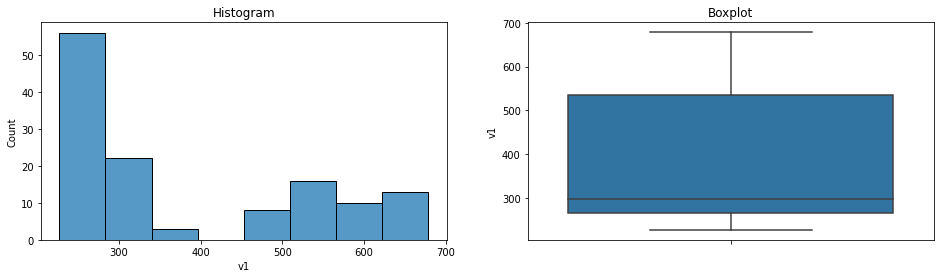


Nama variabel: v1

Nilai Skewness:  0.6767814060276977
Batas atas v1: 1338.5071428571428
Batas bawah v1: -536.6928571428573

Outliers atas v1 : 0
Outliers bawah v1 : 0


In [205]:
diagnostic_plots(train, 'v1')
print('\nNama variabel: v1')
print('\nNilai Skewness: ', train['v1'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'v1', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas v1:',skew_upper_bound)
print('Batas bawah v1:',skew_lower_bound)
print('')
print('Outliers atas v1 : {}'.format(len(train[train['v1'] > skew_upper_bound])))
print('Outliers bawah v1 : {}'.format(len(train[train['v1'] < skew_lower_bound])))

v2

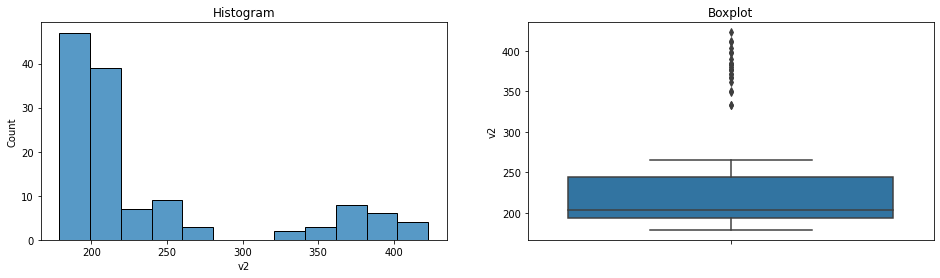


Nama variabel: v2

Nilai Skewness:  1.5056556196496764
Batas atas v2: 399.91354166666406
Batas bawah v2: 37.787500000001955

Outliers atas v2 : 4
Outliers bawah v2 : 0


In [206]:
diagnostic_plots(train, 'v2')
print('\nNama variabel: v2')
print('\nNilai Skewness: ', train['v2'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'v2', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas v2:',skew_upper_bound)
print('Batas bawah v2:',skew_lower_bound)
print('')
print('Outliers atas v2 : {}'.format(len(train[train['v2'] > skew_upper_bound])))
print('Outliers bawah v2 : {}'.format(len(train[train['v2'] < skew_lower_bound])))

v3

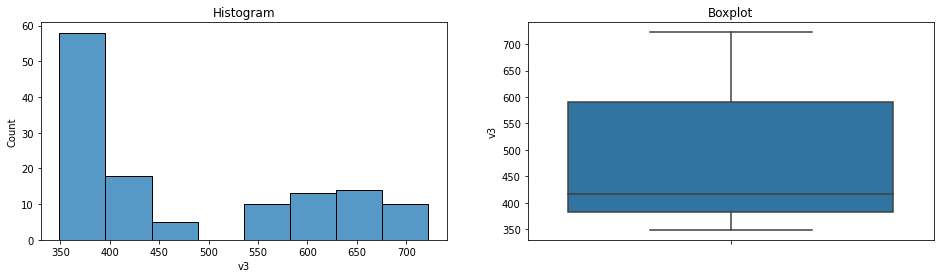


Nama variabel: v3

Nilai Skewness:  0.6401332186082147
Batas atas v3: 1211.9638157894728
Batas bawah v3: -239.70723684210463

Outliers atas v3 : 0
Outliers bawah v3 : 0


In [207]:
diagnostic_plots(train, 'v3')
print('\nNama variabel: v3')
print('\nNilai Skewness: ', train['v3'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'v3', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas v3:',skew_upper_bound)
print('Batas bawah v3:',skew_lower_bound)
print('')
print('Outliers atas v3 : {}'.format(len(train[train['v3'] > skew_upper_bound])))
print('Outliers bawah v3 : {}'.format(len(train[train['v3'] < skew_lower_bound])))

v4

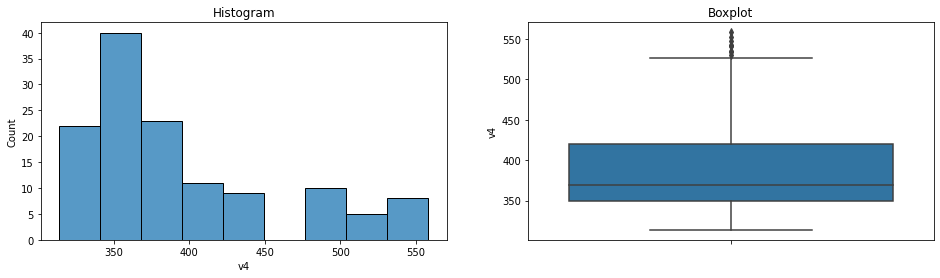


Nama variabel: v4

Nilai Skewness:  1.1646656416675567
Batas atas v4: 633.7979166666663
Batas bawah v4: 135.86458333333343

Outliers atas v4 : 0
Outliers bawah v4 : 0


In [208]:
diagnostic_plots(train, 'v4')
print('\nNama variabel: v4')
print('\nNilai Skewness: ', train['v4'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'v4', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas v4:',skew_upper_bound)
print('Batas bawah v4:',skew_lower_bound)
print('')
print('Outliers atas v4 : {}'.format(len(train[train['v4'] > skew_upper_bound])))
print('Outliers bawah v4 : {}'.format(len(train[train['v4'] < skew_lower_bound])))

v5

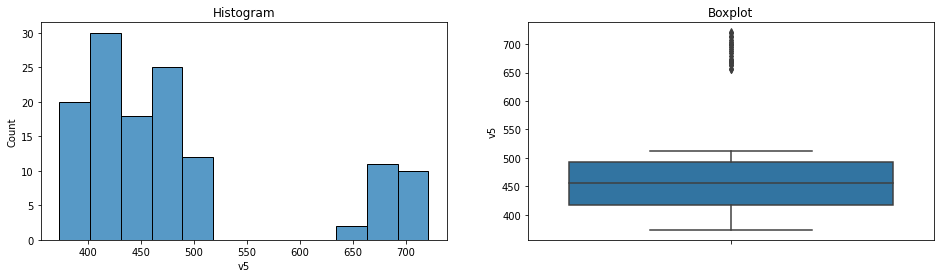


Nama variabel: v5

Nilai Skewness:  1.332315285984606
Batas atas v5: 719.8718749999985
Batas bawah v5: 189.67291666666756

Outliers atas v5 : 1
Outliers bawah v5 : 0


In [209]:
diagnostic_plots(train, 'v5')
print('\nNama variabel: v5')
print('\nNilai Skewness: ', train['v5'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'v5', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas v5:',skew_upper_bound)
print('Batas bawah v5:',skew_lower_bound)
print('')
print('Outliers atas v5 : {}'.format(len(train[train['v5'] > skew_upper_bound])))
print('Outliers bawah v5 : {}'.format(len(train[train['v5'] < skew_lower_bound])))

v6

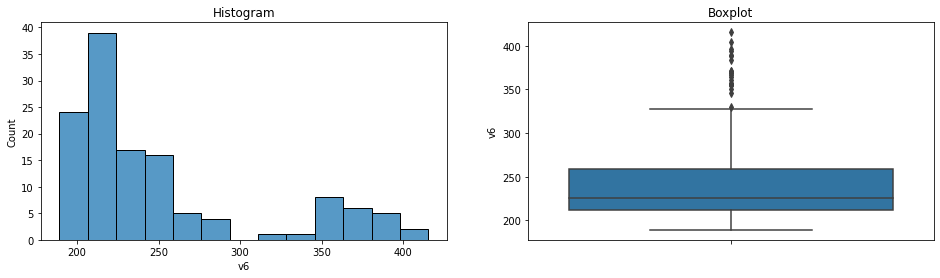


Nama variabel: v6

Nilai Skewness:  1.3347081211311758
Batas atas v6: 397.96562499999914
Batas bawah v6: 73.24583333333385

Outliers atas v6 : 2
Outliers bawah v6 : 0


In [210]:
diagnostic_plots(train, 'v6')
print('\nNama variabel: v6')
print('\nNilai Skewness: ', train['v6'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'v6', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas v6:',skew_upper_bound)
print('Batas bawah v6:',skew_lower_bound)
print('')
print('Outliers atas v6 : {}'.format(len(train[train['v6'] > skew_upper_bound])))
print('Outliers bawah v6 : {}'.format(len(train[train['v6'] < skew_lower_bound])))

v7

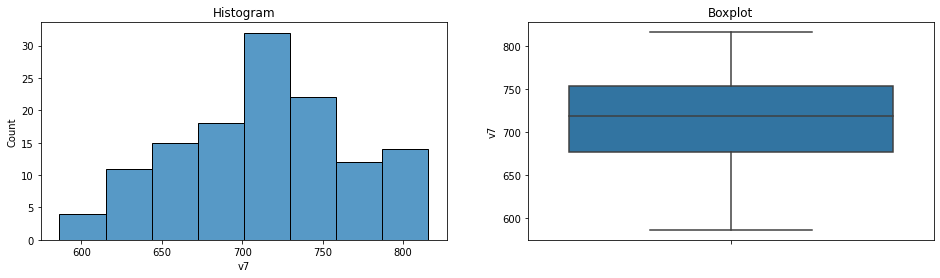


Nama variabel: v7

Nilai Skewness:  -0.18594544262039606
Batas atas v7: 979.3833333333308
Batas bawah v7: 450.5333333333351

Outliers atas v7 : 0
Outliers bawah v7 : 0


In [211]:
diagnostic_plots(train, 'v7')
print('\nNama variabel: v7')
print('\nNilai Skewness: ', train['v7'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'v7', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas v7:',skew_upper_bound)
print('Batas bawah v7:',skew_lower_bound)
print('')
print('Outliers atas v7 : {}'.format(len(train[train['v7'] > skew_upper_bound])))
print('Outliers bawah v7 : {}'.format(len(train[train['v7'] < skew_lower_bound])))

v8

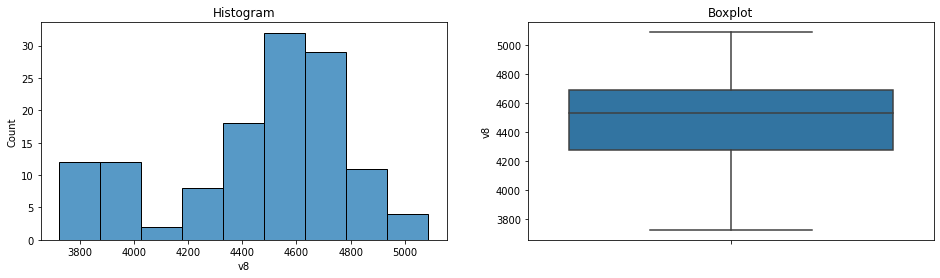


Nama variabel: v8

Nilai Skewness:  -0.7125803461152554
Batas atas v8: 5930.770833333334
Batas bawah v8: 3030.4374999999964

Outliers atas v8 : 0
Outliers bawah v8 : 0


In [212]:
diagnostic_plots(train, 'v8')
print('\nNama variabel: v8')
print('\nNilai Skewness: ', train['v8'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'v8', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas v8:',skew_upper_bound)
print('Batas bawah v8:',skew_lower_bound)
print('')
print('Outliers atas v8 : {}'.format(len(train[train['v8'] > skew_upper_bound])))
print('Outliers bawah v8 : {}'.format(len(train[train['v8'] < skew_lower_bound])))

##### IV.3.4.3.3 Capping

In [213]:
capper_normal = Winsorizer(capping_method='gaussian', tail='both', fold=3, 

variables=['v1','v2','v3','v4','v5','v6','v7','v8'])


capper_normal.fit(train)
train_cln = capper_normal.transform(train)
test_cln = capper_normal.transform(test)

v2 - Before Capping


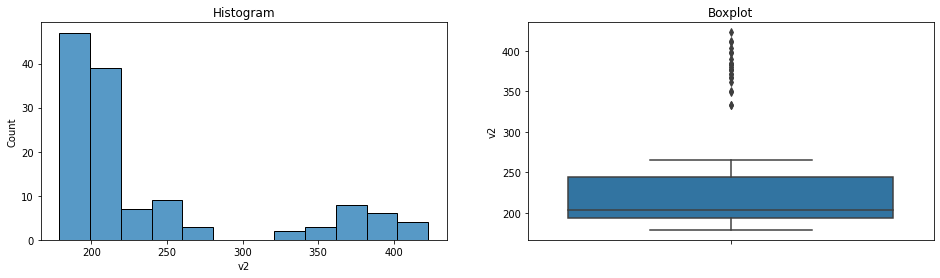


v2 - After Capping


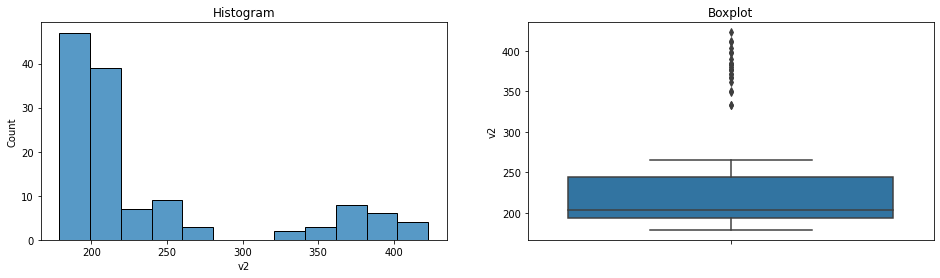

In [216]:
print('v2 - Before Capping')
diagnostic_plots(train, 'v2')
print('\nv2 - After Capping')
diagnostic_plots(train_cln, 'v2')

v4 - Before Capping


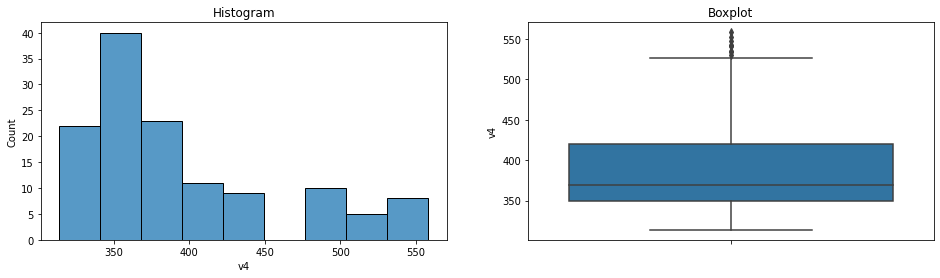


v4 - After Capping


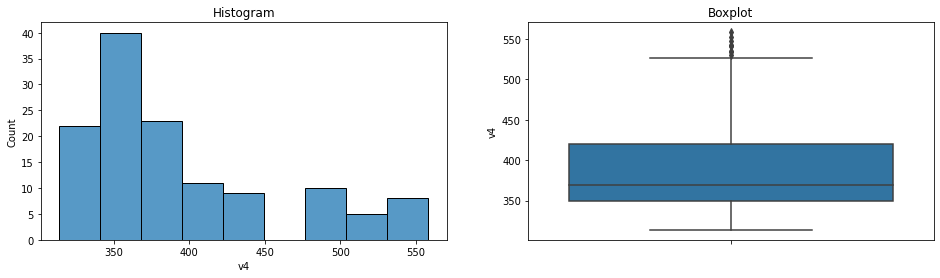

In [217]:
print('v4 - Before Capping')
diagnostic_plots(train, 'v4')
print('\nv4 - After Capping')
diagnostic_plots(train_cln, 'v4')

### IV.3.5 Scaling and Encoding

In [223]:
# Untuk melakukan encoding secara ordinal
from sklearn.preprocessing import OrdinalEncoder

In [225]:
X_train = train.drop(columns='target')
y_train = train['target']

X_test = test.drop(columns='target')
y_test = test['target']

In [226]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Numerical Features:', num_columns)
print('Categorical Features:', cat_columns)

Numerical Features: ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Categorical Features: ['sample_type']


In [227]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [228]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scld = scaler.transform(X_train_num)
X_test_num_scld = scaler.transform(X_test_num)

X_train_num_scld

array([[0.02286529, 0.03934225, 0.10034482, ..., 0.05954092, 0.41034583,
        0.55745476],
       [0.90591294, 0.80979458, 0.78061845, ..., 0.75988357, 0.58064516,
        0.00940687],
       [0.92911603, 0.86416338, 0.89899677, ..., 0.73276593, 0.75356001,
        0.12473895],
       ...,
       [0.11922463, 0.03551731, 0.07409805, ..., 0.10051214, 0.34205173,
        0.78620816],
       [0.11597324, 0.00901593, 0.05874279, ..., 0.01532736, 0.40453357,
        0.68410448],
       [0.08665532, 0.03206803, 0.10814521, ..., 0.14750746, 0.73363484,
        0.79440855]])

In [229]:
# feature encoding menggunakan OneHotEncoder

encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()

X_train_cat_enc

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [230]:
# menggabungkan kolom numerikal yang sudah di-scaled dengan kolom kategorikal yang sudah di-encoded

X_train_final = np.concatenate([X_train_num_scld, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scld, X_test_cat_enc], axis=1)

X_train_final

array([[0.02286529, 0.03934225, 0.10034482, ..., 0.55745476, 1.        ,
        0.        ],
       [0.90591294, 0.80979458, 0.78061845, ..., 0.00940687, 0.        ,
        1.        ],
       [0.92911603, 0.86416338, 0.89899677, ..., 0.12473895, 0.        ,
        1.        ],
       ...,
       [0.11922463, 0.03551731, 0.07409805, ..., 0.78620816, 1.        ,
        0.        ],
       [0.11597324, 0.00901593, 0.05874279, ..., 0.68410448, 1.        ,
        0.        ],
       [0.08665532, 0.03206803, 0.10814521, ..., 0.79440855, 1.        ,
        0.        ]])

In [231]:
# membuat dataframe untuk X_train_final

X_train_final_df = pd.DataFrame(X_train_final)
X_test_final_df = pd.DataFrame(X_test_final)
X_train_final_df

0         1         2         3         4         5         6  \
0    0.022865  0.039342  0.100345  0.117118  0.115436  0.059541  0.410346   
1    0.905913  0.809795  0.780618  0.839711  0.926750  0.759884  0.580645   
2    0.929116  0.864163  0.898997  0.871306  0.937872  0.732766  0.753560   
3    0.669827  0.131448  0.633248  0.245966  0.296740  0.129822  0.042702   
4    0.565912  0.051278  0.564953  0.160936  0.298178  0.026749  0.229058   
..        ...       ...       ...       ...       ...       ...       ...   
123  0.719028  0.190844  0.746844  0.378248  0.362668  0.214366  0.613943   
124  0.146122  0.110377  0.118200  0.258477  0.206136  0.231974  0.718977   
125  0.119225  0.035517  0.074098  0.090154  0.056184  0.100512  0.342052   
126  0.115973  0.009016  0.058743  0.055563  0.079386  0.015327  0.404534   
127  0.086655  0.032068  0.108145  0.277373  0.151306  0.147507  0.733635   

            7    8    9  
0    0.557455  1.0  0.0  
1    0.009407  0.0  1.0  
2    0.124739  0.0  1.0  
3    0.538568  0.0  1.0  
4    0.541186  0.0  1.0  
..        ...  ...  ...  
123  0.694156  0.0  1.0  
124  0.726337  1.0  0.0  
125  0.786208  1.0  0.0  
126  0.684104  1.0  0.0  
127  0.794409  1.0  0.0  

[128 rows x 10 columns]

In [232]:
# membuat dataframe untuk y_train

y_train_df = pd.DataFrame(y_train)
y_train_df

target
17     4.65
148    4.73
153    4.13
102    5.03
110    4.95
..      ...
124    5.01
82     4.64
38     5.02
19     4.78
74     4.89

[128 rows x 1 columns]

### IV.3.6 Data Training

In [233]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train_final_df, y_train_df)

LinearRegression()

In [237]:
y_pred_train = model_lin_reg.predict(X_train_final_df)
y_pred_test = model_lin_reg.predict(X_test_final_df)

### IV.3.7 Data Evaluation

In [239]:
print('MAE')
print('MAE - Train Set : ', mean_absolute_error(y_train_df, y_pred_train))
print('MAE - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

print('MSE')
print('MSE - Train Set : ', mean_squared_error(y_train_df, y_pred_train))
print('MSE - Test Set  : ', mean_squared_error(y_test, y_pred_test))

print('RMSE')
print('RMSE - Train Set : ', mean_squared_error(y_train_df, y_pred_train, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test, squared=False))

print('R2 Score')
print('R2 Score - Train Set :', r2_score(y_train_df, y_pred_train))
print('R2 Score - Test Set  :', r2_score(y_test, y_pred_test))

MAE
MAE - Train Set :  0.14662571287244858
MAE - Test Set  :  0.15587305094300813
MSE
MSE - Train Set :  0.03304222093260466
MSE - Test Set  :  0.031535193243627524
RMSE
RMSE - Train Set :  0.1817751933917405
RMSE - Test Set  :  0.1775815115478735
R2 Score
R2 Score - Train Set : 0.2885506175334275
R2 Score - Test Set  : 0.23043102005007876


<Figure size 360x216 with 0 Axes>

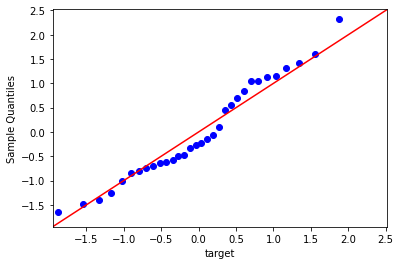

In [243]:
from statsmodels.graphics.gofplots import qqplot

res = y_test - y_pred_test.ravel()

plt.figure(figsize=(5,3))
qqplot(res, line='45', fit='True')
plt.xlabel("target")
plt.show()

Terlihat bahwa evaluasi ini menandakan model yang dijalankan bagus, tidak banyak titik yang berbeda dari garisnya.

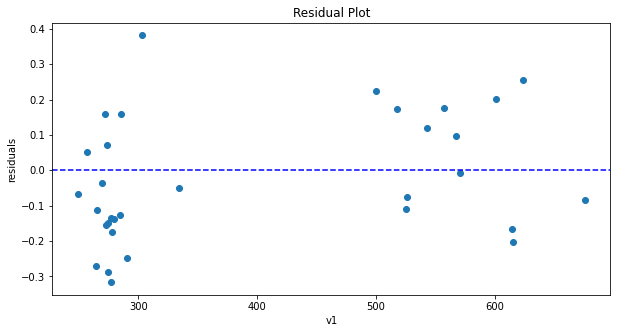

In [244]:
plt.figure(figsize=(10,5))
plt.scatter(x=X_test['v1'],y=res)
plt.title('Residual Plot')
plt.xlabel('v1')
plt.ylabel('residuals')
plt.axhline(y=0, color='b', linestyle='--')
plt.show()

Terlihat bahwa evaluasi ini menandakan model yang dijalankan bagus, titik yang ada tidak selurus garis.

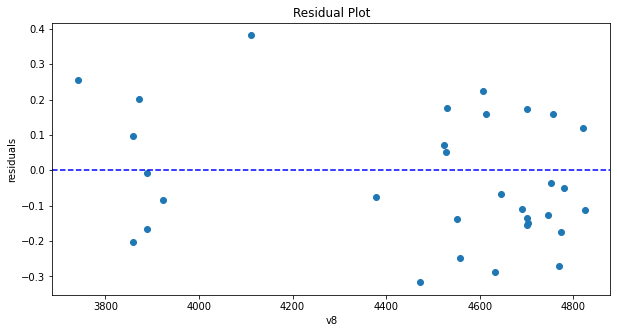

In [245]:
plt.figure(figsize=(10,5))
plt.scatter(x=X_test['v8'],y=res)
plt.title('Residual Plot')
plt.xlabel('v8')
plt.ylabel('residuals')
plt.axhline(y=0, color='b', linestyle='--')
plt.show()

Terlihat bahwa evaluasi ini menandakan model yang dijalankan bagus, titik yang ada tidak selurus garis.

### IV.3.8 Data Inference

In [247]:
df_inf = pd.DataFrame([
    [260.600000,194.600000,375.466667,348.533333,394.600000,273.133333,712.000000,4867.066667,'lab 1'], 
    [195.733333,375.466667,348.533333,34,419.000000,220.066667,677.200000,4673.466667,'lab 2'],
    [247.266667,199.000000,391.333333,333.333333,417.222222,222.133333,742.066667,4673.466667,'lab 2'],
    [575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,'lab 2']
    ], 
columns=['v1', 'v2','v3','v4','v5','v6','v7','v8','sample_type'])
df_inf

v1          v2          v3          v4          v5          v6  \
0  260.600000  194.600000  375.466667  348.533333  394.600000  273.133333   
1  195.733333  375.466667  348.533333   34.000000  419.000000  220.066667   
2  247.266667  199.000000  391.333333  333.333333  417.222222  222.133333   
3  575.200000  350.266667  648.333333  495.400000  679.800000  346.266667   

           v7           v8 sample_type  
0  712.000000  4867.066667       lab 1  
1  677.200000  4673.466667       lab 2  
2  742.066667  4673.466667       lab 2  
3  718.733333  3903.333333       lab 2

In [248]:
# Pipeline for Data Preprocessing for deployment app.
inf_num = X_train_num.columns.values
inf_cat = X_train_cat.columns.values
sclr_pipe = Pipeline([('Scaled', scaler)])
encdr_pipe = Pipeline([('Encoded', encoder)])

preproc_pipe = ColumnTransformer(transformers=[('Numerical', sclr_pipe, inf_num), ('Categorical', encdr_pipe, inf_cat)])

preproc_pipe.fit(X_train)

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('Scaled', MinMaxScaler())]),
                                 array(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'], dtype=object)),
                                ('Categorical',
                                 Pipeline(steps=[('Encoded',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 array(['sample_type'], dtype=object))])

In [249]:
# Transform inference dataset.
df_inf_final = preproc_pipe.transform(df_inf)

In [250]:
prd_inf = model_lin_reg.predict(df_inf_final)
prd_inf_df = pd.DataFrame(prd_inf, columns=['Predicted target'])
prd_inf_df

Predicted target
0          4.630697
1          4.424138
2          4.356065
3          4.611191

In [251]:
pd.concat([df_inf, prd_inf_df], axis=1)

v1          v2          v3          v4          v5          v6  \
0  260.600000  194.600000  375.466667  348.533333  394.600000  273.133333   
1  195.733333  375.466667  348.533333   34.000000  419.000000  220.066667   
2  247.266667  199.000000  391.333333  333.333333  417.222222  222.133333   
3  575.200000  350.266667  648.333333  495.400000  679.800000  346.266667   

           v7           v8 sample_type  Predicted target  
0  712.000000  4867.066667       lab 1          4.630697  
1  677.200000  4673.466667       lab 2          4.424138  
2  742.066667  4673.466667       lab 2          4.356065  
3  718.733333  3903.333333       lab 2          4.611191

# v. Conclusion

Data yang ada mempunyai beberapa outlier, namun masih dapat diolah pada prediksi regresi linear.